<a href="https://colab.research.google.com/github/MadmanMarble/Planet_U-NET/blob/main/R_matrix_analysis_plotting_20240326.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
install.packages(c('raster','sf','fasterize'))
install.packages("googledrive")
install.packages("devtools")
install.packages("caret")
devtools:::install_github("gearslaboratory/gdalUtils")

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




Skipping 1 packages not available: rgdal



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpyDvNFL/remotes16cc0599b7ad8/gearslaboratory-gdalUtils-8872aaf/DESCRIPTION’ ... OK
* preparing ‘gdalUtils’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘gdalUtils_2.0.3.2.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in i.p(...):
“installation of package ‘/tmp/RtmpyDvNFL/file16cc054bd0609/gdalUtils_2.0.3.2.tar.gz’ had non-zero exit status”


In [3]:
library(googledrive)
library(raster)
library(magrittr)
library(data.table)
library(caret)
library(ggplot2)
library(tidyr)

Loading required package: sp


Attaching package: ‘magrittr’


The following object is masked from ‘package:raster’:

    extract



Attaching package: ‘data.table’


The following object is masked from ‘package:raster’:

    shift


Loading required package: ggplot2

Loading required package: lattice


Attaching package: ‘tidyr’


The following object is masked from ‘package:magrittr’:

    extract


The following object is masked from ‘package:raster’:

    extract




In [4]:
drive_auth(use_oob = TRUE, cache = FALSE)

Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=https%3A%2F%2Fwww.tidyverse.org%2Fgoogle-callback%2F&response_type=code&state=55c6b882f3315b51fc38d4fe896caa72&access_type=offline&prompt=consent



Enter authorization code: eyJjb2RlIjoiNC8wQWVhWVNIQzh5YUd2NVplWkZiQXdPdjlxeGhyUzdXejJMQVlxYXBBZHk4Y3Q2Q055RzdxSXJkQzdrZXA1cFFqSHZKcmJEQSIsInN0YXRlIjoiNTVjNmI4ODJmMzMxNWI1MWZjMzhkNGZlODk2Y2FhNzIifQ==


In [4]:
dir.create("/content/threeyear")
dir.create("/content/twoyear")
dir.create("/content/oneyear")
dir.create("/content/groundtruth")

In [5]:
# https://drive.google.com/drive/folders/1-9h2ErD_yFI8SVyRDA-VSgxPMf9kerHb?usp=drive_link
folder = "1-9h2ErD_yFI8SVyRDA-VSgxPMf9kerHb"
folder_id = drive_get(as_id(folder))

files = drive_ls(folder_id)

for (i in seq_along(files$name)) {
  i_dir <- files[i, ] # Select directory
    try({

      # Download files from the directory to the specified path
      drive_download(
        as_id(i_dir$id[1]),
        path = paste0('/content/groundtruth/', i_dir$name[1])
      )
    })
  }


File downloaded:

• 1516_multi_wl.tif <id: 1lUY7Qpmy6h_R1gykDgf4wYOpMezBLARS>

Saved locally as:

• /content/groundtruth/1516_multi_wl.tif

File downloaded:

• 283_multi_wl.tif <id: 1lbcAX1pJAvlhNKgL6AH9jzp7AwlUxtLY>

Saved locally as:

• /content/groundtruth/283_multi_wl.tif

File downloaded:

• 265_multi_wl.tif <id: 1m73nnQtKjUf7AqpNtcdGGOHFedWolBHj>

Saved locally as:

• /content/groundtruth/265_multi_wl.tif

File downloaded:

• 1549_multi_wl.tif <id: 1lIOAPa1PDn2mJ4oWjgYPXcVlHYus0P-g>

Saved locally as:

• /content/groundtruth/1549_multi_wl.tif

File downloaded:

• 1472_multi_wl.tif <id: 1lNNzNiA75sxPiey0eYLOPSIAZUvXVdCm>

Saved locally as:

• /content/groundtruth/1472_multi_wl.tif

File downloaded:

• 1530_multi_wl.tif <id: 1kYD12VcOu251OGq_YA-6kQ5DpskD4oJ0>

Saved locally as:

• /content/groundtruth/1530_multi_wl.tif

File downloaded:

• 808_multi_wl.tif <id: 1kdLHbwEIsZTbN9C084wMpIsbL42oK_3J>

Saved locally as:

• /content/groundtruth/808_multi_wl.tif

File downloaded:

• 776_mu

In [7]:
# https://drive.google.com/drive/folders/1-S7EtjyO1Wh9xvO8XBTXcjLpZfzqJxTD?usp=drive_link
folder = "1-S7EtjyO1Wh9xvO8XBTXcjLpZfzqJxTD"
folder_id = drive_get(as_id(folder))

files = drive_ls(folder_id)

for (i in seq_along(files$name)) {
  i_dir <- files[i, ] # Select directory
    try({

      # Download files from the directory to the specified path
      drive_download(
        as_id(i_dir$id[1]),
        path = paste0('/content/oneyear/', i_dir$name[1])
      )
    })
  }

Streaming output truncated to the last 5000 lines.
• epoch_311_1549_1year.tif <id: 1d5oVcm-N6BGxEkaidU9uyhSXBmjQo_4W>

Saved locally as:

• /content/oneyear/epoch_311_1549_1year.tif

File downloaded:

• epoch_311_1530_1year.tif <id: 1dIapO_2pFlYJ5JShvZNUtEtcGh-3jqse>

Saved locally as:

• /content/oneyear/epoch_311_1530_1year.tif

File downloaded:

• epoch_311_1516_1year.tif <id: 1dM8tFYdCkGMyV_jh4Y3-wnPlEtlVxdKg>

Saved locally as:

• /content/oneyear/epoch_311_1516_1year.tif

File downloaded:

• epoch_311_1472_1year.tif <id: 1crSSSvUXW0W5wvL5aQbC5Hf8TDmHxPyV>

Saved locally as:

• /content/oneyear/epoch_311_1472_1year.tif

File downloaded:

• epoch_306_823_1year.tif <id: 1cJ_lzOwPTlUUKbyxQFTgusDesd4Om5n->

Saved locally as:

• /content/oneyear/epoch_306_823_1year.tif

File downloaded:

• epoch_306_808_1year.tif <id: 1cK2bqSn4PslZvzDxn0X3eoYhxmwaeF5L>

Saved locally as:

• /content/oneyear/epoch_306_808_1year.tif

File downloaded:

• epoch_306_776_1year.tif <id: 1cOkf0lDwuJUX4PLXkbbgH

In [8]:
# https://drive.google.com/drive/folders/1VuJp_qtqR-_B60ZfFtcJEfYHcbfh7QN4?usp=drive_link
folder = "1VuJp_qtqR-_B60ZfFtcJEfYHcbfh7QN4"
folder_id = drive_get(as_id(folder))

files = drive_ls(folder_id)

for (i in seq_along(files$name)) {
  i_dir <- files[i, ] # Select directory
    try({

      # Download files from the directory to the specified path
      drive_download(
        as_id(i_dir$id[1]),
        path = paste0('/content/threeyear/', i_dir$name[1])
      )
    })
  }

Streaming output truncated to the last 5000 lines.
• epoch_311_1549_3year.tif <id: 1cc3WUhw2mpbj5B24eBdmdH2uHF_HQOdP>

Saved locally as:

• /content/threeyear/epoch_311_1549_3year.tif

File downloaded:

• epoch_311_1530_3year.tif <id: 1cdCMkiQIXnhvSP5Hdtdh4mB47lpIGJpj>

Saved locally as:

• /content/threeyear/epoch_311_1530_3year.tif

File downloaded:

• epoch_311_1516_3year.tif <id: 1ciSydv8Nu-SFB6kD78kWuMGjvnGg8Sli>

Saved locally as:

• /content/threeyear/epoch_311_1516_3year.tif

File downloaded:

• epoch_311_1472_3year.tif <id: 1cN9SUVMH9PXqVRLefDtQNBlfoOutd7LP>

Saved locally as:

• /content/threeyear/epoch_311_1472_3year.tif

File downloaded:

• epoch_306_823_3year.tif <id: 1bdwzynXEa_EfCe2wl6bkFSnOHCAUZtFW>

Saved locally as:

• /content/threeyear/epoch_306_823_3year.tif

File downloaded:

• epoch_306_808_3year.tif <id: 1bh1alpAInOEk8wQvUUdOogZLyUXGj67Q>

Saved locally as:

• /content/threeyear/epoch_306_808_3year.tif

File downloaded:

• epoch_306_776_3year.tif <id: 1bkZ53mbjO

In [9]:
# https://drive.google.com/drive/folders/1-4Br0ukk_MAc7j0M69YfzSP3U4IwedS0?usp=drive_link
folder = "1-4Br0ukk_MAc7j0M69YfzSP3U4IwedS0"
folder_id = drive_get(as_id(folder))

files = drive_ls(folder_id)

for (i in seq_along(files$name)) {
  i_dir <- files[i, ] # Select directory
    try({

      # Download files from the directory to the specified path
      drive_download(
        as_id(i_dir$id[1]),
        path = paste0('/content/twoyear/', i_dir$name[1])
      )
    })
  }

Streaming output truncated to the last 5000 lines.
Saved locally as:

• /content/twoyear/epoch_311_1549_2year.tif

File downloaded:

• epoch_311_1530_2year.tif <id: 1bzKaLnwZnsfXo_7pXSvk-qLvo-FemyCr>

Saved locally as:

• /content/twoyear/epoch_311_1530_2year.tif

File downloaded:

• epoch_311_1516_2year.tif <id: 1c48_IM05p1liJvu2angSRc4QouWysdJx>

Saved locally as:

• /content/twoyear/epoch_311_1516_2year.tif

File downloaded:

• epoch_311_1472_2year.tif <id: 1c5n6VKBYqTgFOoSzGORw1KYuXo0G1dbX>

Saved locally as:

• /content/twoyear/epoch_311_1472_2year.tif

File downloaded:

• epoch_306_823_2year.tif <id: 1bln6_rMkJ2D3C8-5JtHTwmlkqETseaX2>

Saved locally as:

• /content/twoyear/epoch_306_823_2year.tif

File downloaded:

• epoch_306_808_2year.tif <id: 1bnpadlyJzJasnWcUl_AH7gvTXFAu9xAX>

Saved locally as:

• /content/twoyear/epoch_306_808_2year.tif

File downloaded:

• epoch_306_776_2year.tif <id: 1bfDpu6xd1DOJcT3UYJaNexexh7YU_7jw>

Saved locally as:

• /content/twoyear/epoch_306_776_2y

In [5]:
install.packages("dplyr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [6]:
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:raster’:

    intersect, select, union


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [7]:
file_list_01 <-list.files("/content/oneyear", pattern = "*.tif", full.names = TRUE)
names(file_list_01) <- list.files("/content/oneyear", pattern = "*.tif")
file_list_02 <-list.files("/content/twoyear", pattern = "*.tif", full.names = TRUE)
names(file_list_02) <- list.files("/content/twoyear", pattern = "*.tif")
file_list_03 <-list.files("/content/threeyear", pattern = "*.tif", full.names = TRUE)
names(file_list_03) <- list.files("/content/threeyear", pattern = "*.tif")
file_list_labels <-list.files("/content/groundtruth", pattern = "*.tif", full.names = TRUE)

In [8]:
file_list_labels

[1] "/content/groundtruth/1472_multi_wl.tif"
 [2] "/content/groundtruth/1516_multi_wl.tif"
 [3] "/content/groundtruth/1530_multi_wl.tif"
 [4] "/content/groundtruth/1549_multi_wl.tif"
 [5] "/content/groundtruth/157_multi_wl.tif" 
 [6] "/content/groundtruth/265_multi_wl.tif" 
 [7] "/content/groundtruth/283_multi_wl.tif" 
 [8] "/content/groundtruth/776_multi_wl.tif" 
 [9] "/content/groundtruth/808_multi_wl.tif" 
[10] "/content/groundtruth/823_multi_wl.tif"

In [9]:
file_list_01 %>% length

[1] 1000

In [10]:
file_list_02 %>% length

[1] 1000

In [11]:
file_list_03 %>% length

[1] 1000

In [12]:
id_dt_01 <-data.table(
  predict_path = file_list_01,
  label_path = file_list_labels %>% unlist,
  epoch = sapply(strsplit(names(file_list_01), '_'), function(x) x[2]),
  tile_id = sapply(strsplit(names(file_list_01), '_'), function(x) x[3])
  )
# id_dt_01

In [13]:
id_dt_02 <-data.table(
  predict_path = file_list_02,
  label_path = file_list_labels %>% unlist,
  epoch = sapply(strsplit(names(file_list_02), '_'), function(x) x[2]),
  tile_id = sapply(strsplit(names(file_list_02), '_'), function(x) x[3])
  )
# id_dt_02

In [14]:
id_dt_03 <-data.table(
  predict_path = file_list_03,
  label_path = file_list_labels %>% unlist,
  epoch = sapply(strsplit(names(file_list_03), '_'), function(x) x[2]),
  tile_id = sapply(strsplit(names(file_list_03), '_'), function(x) x[3])
  )
# id_dt_03

In [15]:
id_dt_01_ordered <- id_dt_01[, epoch := as.integer(epoch)]
setorder(id_dt_01_ordered, epoch)
id_dt_02_ordered <- id_dt_02[, epoch := as.integer(epoch)]
setorder(id_dt_02_ordered, epoch)
id_dt_03_ordered <- id_dt_03[, epoch := as.integer(epoch)]
setorder(id_dt_03_ordered, epoch)

In [ ]:
id_dt_01_ordered

### misc - works but dont need.

In [ ]:
# id_dt[,label_path := paste0('/content/groundtruth/test_labels/',tile_id,'_nwi_ccap_filled_utm4.tif')]

In [ ]:
# id_dt[tile_id=='planet',tile_id := epoch]

In [ ]:
# id_dt[tile_id==epoch,epoch := 50]

In [ ]:
# # Assuming id_dt is already created and contains the necessary file paths

# # Function to read rasters and compute confusion matrix
# compute_confusion <- function(predict_path, label_path) {
#   predict_rast <- raster(predict_path)
#   label_rast <- raster(label_path)

#   # Flatten the rasters to vectors
#   prediction <- getValues(predict_rast)
#   label <- getValues(label_rast)

#   # Create a data table of predictions and labels
#   out_dt <- data.table(prediction = prediction, label = label)

#   # Convert to factors and ensure they have the same levels
#   levels_list <- sort(unique(c(prediction, label)))
#   out_dt$prediction <- factor(out_dt$prediction, levels = levels_list)
#   out_dt$label <- factor(out_dt$label, levels = levels_list)

#   # Compute confusion matrix
#   confusion_matrix <- confusionMatrix(out_dt$prediction, out_dt$label)

#   return(confusion_matrix)
# }

In [ ]:
# # Loop over each row in id_dt and compute confusion matrices
# # this is for three years data
# confusion_matrices <- lapply(seq_len(nrow(id_dt)), function(x) {
#   compute_confusion(id_dt[x,]$predict_path, id_dt[x,]$label_path)
# })


In [ ]:
# confusion_matrices[5]

In [ ]:
# # Adjusted function to also return the prediction and label data
# compute_confusion <- function(predict_path, label_path) {
#   predict_rast <- raster(predict_path)
#   label_rast <- raster(label_path)

#   # Convert rasters to vectors
#   prediction <- getValues(predict_rast)
#   label <- getValues(label_rast)

#   # Compute confusion matrix
#   prediction_factor = factor(prediction, levels = sort(unique(c(prediction, label))))
#   label_factor = factor(label, levels = sort(unique(c(prediction, label))))
#   confusion_matrix <- confusionMatrix(prediction_factor, label_factor)

#   # Return the data along with the confusion matrix
#   return(list(confusion_matrix = confusion_matrix,
#               prediction = prediction_factor,
#               label = label_factor))
# }

In [ ]:
# # Applying the adjusted function
# confusion_data <- lapply(seq_len(nrow(id_dt)), function(x) {
#   compute_confusion(id_dt[x,]$predict_path, id_dt[x,]$label_path)
# })

In [ ]:
# # Create confusion_dt from confusion_data
# confusion_dt <- rbindlist(lapply(confusion_data, function(item) {
#   data.table(
#     # prediction = as.integer(item$prediction),  # Convert factors back to integers if necessary
#     # label = as.integer(item$label)
#   )
# }), use.names = TRUE, fill = TRUE)

# # Optionally, add epoch and tile_id information if it's relevant and available
# confusion_dt[, epoch := rep(id_dt$epoch, each = length(confusion_data[[1]]$prediction))]
# confusion_dt[, tile_id := rep(id_dt$tile_id, each = length(confusion_data[[1]]$prediction))]


In [ ]:
# confusion_dt$epoch %>% length

[1] 147456000

In [ ]:
# # library(data.table)
# # library(caret)
# # library(dplyr)
# # library(purrr)

# # Assuming confusion_dt is already created and contains the predictions and true labels

# # Function to calculate accuracy for a given epoch
# calculate_accuracy_for_epoch <- function(epoch, confusion_dt) {
#   conf_dt <- confusion_dt[epoch == epoch, ]
#   cm <- confusionMatrix(conf_dt$label, conf_dt$prediction)

#   # Extract overall accuracy and other metrics if needed
#   out_dt <- data.table(t(cm$overall['Accuracy']))
#   out_dt$epoch <- epoch
#   return(out_dt)
# }

# # Calculate accuracy for each unique epoch
# accuracy_dt <- unique(confusion_dt$epoch) %>%
#   map_df(~calculate_accuracy_for_epoch(.x, confusion_dt))

# # Print the resulting data table with accuracy for each epoch
# print(accuracy_dt)


In [ ]:
# # Loop over each row in id_dt and compute confusion matrices
# confusion_matrices_2 <- lapply(seq_len(nrow(id_dt_2)), function(x) {
#   compute_confusion(id_dt_2[x,]$predict_path, id_dt_2[x,]$label_path)
# })

# # Optionally, if you want to store the confusion matrices in a list within the original data table
# # id_dt[, confusion_matrix := confusion_matrices, by = .(epoch, tile_id)]

In [ ]:
# id_dt # predict_path label_path epoch tile_id

In [ ]:
# id_dt$epoch %>% format

In [ ]:
# unzip("/content/1year.zip", files = NULL, list = FALSE, overwrite = TRUE,
#       junkpaths = FALSE, exdir = "/content/1year", unzip = "internal",
#       setTimes = FALSE)

In [ ]:
# unzip("/content/2year.zip", files = NULL, list = FALSE, overwrite = TRUE,
#       junkpaths = FALSE, exdir = "/content/2year", unzip = "internal",
#       setTimes = FALSE)

In [ ]:
# unzip("/content/3year.zip", files = NULL, list = FALSE, overwrite = TRUE,
#       junkpaths = FALSE, exdir = "/content/3year", unzip = "internal",
#       setTimes = FALSE)

In [ ]:
# unzip("/content/groundtruth.zip", files = NULL, list = FALSE, overwrite = TRUE,
#       junkpaths = FALSE, exdir = "/content/groundtruth", unzip = "internal",
#       setTimes = FALSE)

In [ ]:
# # copy the final prediction to the main model folder for 1, 2, and 3 years
# source_dir <- "/content/1year/model_03222023_1255/predictions"
# destination_dir <- "/content/1year/model_03222023_1255"
# tif_files <- list.files(source_dir, pattern = "\\.tif$", full.names = TRUE)
# for (file in tif_files) {
#   file_name <- basename(file)
#   destination_file <- file.path(destination_dir, file_name)
#   file.copy(file, destination_file)
# }

# source_dir <- "/content/2year/model_03222024_1255/predictions"
# destination_dir <- "/content/2year/model_03222024_1255"
# tif_files <- list.files(source_dir, pattern = "\\.tif$", full.names = TRUE)
# for (file in tif_files) {
#   file_name <- basename(file)
#   destination_file <- file.path(destination_dir, file_name)
#   file.copy(file, destination_file)
# }

# source_dir <- "/content/3year/model_03222023_1255/predictions"
# destination_dir <- "/content/3year/model_03222023_1255"
# tif_files <- list.files(source_dir, pattern = "\\.tif$", full.names = TRUE)
# for (file in tif_files) {
#   file_name <- basename(file)
#   destination_file <- file.path(destination_dir, file_name)
#   file.copy(file, destination_file)
# }


### Back to plotting

In [17]:
num_rows1 <- nrow(id_dt_01_ordered)
print (num_rows1)
num_rows2 <- nrow(id_dt_02_ordered)
print (num_rows2)
num_rows3 <- nrow(id_dt_03_ordered)
print (num_rows3)

[1] 1000
[1] 1000
[1] 1000


In [ ]:
# take a subset of the id_dt bc its 1000 rows. take the first 20 which are from epoch 1 and epoch 101. should show some difference
# id_dt_ordered_set_1 <- id_dt_ordered[1:100,]

# id_dt_01_ordered[, batch := cut(seq_len(nrow(id_dt_01_ordered)), breaks=10, labels = FALSE)]
# batches <- split(id_dt_01_ordered, id_dt_01_ordered$batch)
# batch1 <- batches[[1]]
# batch2 <- batches[[2]]
# batch3 <- batches[[3]]
# batch4 <- batches[[4]]
# batch5 <- batches[[5]]
# batch6 <- batches[[6]]
# batch7 <- batches[[7]]
# batch8 <- batches[[8]]
# batch9 <- batches[[9]]
# batch10 <- batches[[10]]

In [23]:
# id_dt_01_ordered[, batch := cut(seq_len(nrow(id_dt_01_ordered)), breaks=2, labels = FALSE)]
# batches <- split(id_dt_01_ordered, id_dt_01_ordered$batch)
# id_dt_01_batch1 <- batches[[1]]
# id_dt_01_batch2 <- batches[[2]]

In [24]:
# sapply(batches, nrow)

1   2 
500 500

In [ ]:
# #  loop through each batch, instead of the whole 1000 row table.
# confusion_id_dt_01_batch1 <-
# 1:nrow(id_dt_01_batch1) %>%
#   lapply(function(x){
#   cat("Processing path: ", id_dt_01_batch1[x,]$predict_path, "\n")  # Changed from id_dt to batch1
#   predict_rast <- stack(id_dt_01_batch1[x,]$predict_path)  # Changed from id_dt to batch1
#   label_rast <- stack(id_dt_01_batch1[x,]$label_path)  # Changed from id_dt to batch1

#   out_dt <- data.table(
#   prediction = values(predict_rast) %>% unlist,
#   label = values(label_rast) %>% unlist
#     )
#   names(out_dt) <- c('prediction', 'label')
#   out_dt$epoch <- id_dt_01_batch1[x,]$epoch  # Changed from id_dt to batch1
#   out_dt$tile_id <- id_dt_01_batch1[x,]$tile_id  # Changed from id_dt to batch1
#     return(out_dt)
#   }) %>% rbindlist

# # Optionally, you can print or return this data.table
# print(confusion_dt_batch1)

In [28]:
# confusion_id_dt_01_batch1[,prediction:=factor(prediction %>% paste() %>% paste())]
# confusion_id_dt_01_batch1[,label:=factor(label %>% paste() %>% paste())]
# # confusion_dt_batch1

In [29]:
# confusion_id_dt_01_batch1$prediction %>% levels
# confusion_id_dt_01_batch1$label %>%levels

[1] "0" "1" "2" "3" "4" "5" "6"

[1] "1" "2" "3" "4" "5" "6" "7"

In [30]:
# # '0''1''2''3''4''5''6' predict levels
# # '1''2''3''4''5''6''7' label levels
# # there's a mismatch bc I had to set it to start from 0 in the model.
# # lets fix this by subtracing one from the labels
# confusion_id_dt_01_batch1 <- confusion_id_dt_01_batch1 %>%
#   mutate(label = as.numeric(as.character(label))-1)
# confusion_id_dt_01_batch1$label <- factor(confusion_id_dt_01_batch1$label, levels = 0:6)

In [31]:
# levels(confusion_id_dt_01_batch1$prediction)
# levels(confusion_id_dt_01_batch1$label)

[1] "0" "1" "2" "3" "4" "5" "6"

[1] "0" "1" "2" "3" "4" "5" "6"

In [32]:
# confusion_id_dt_01_batch1$prediction %>% class
# confusion_id_dt_01_batch1$label %>% class

[1] "factor"

[1] "factor"

In [33]:
# accuracy_dt<-
#   unique(confusion_id_dt_01_batch1$epoch) %>%
# lapply(function(x){
#   conf_dt <- confusion_id_dt_01_batch1[epoch ==x,]
#   # print(conf_dt)
#  out_dt <-  confusionMatrix(conf_dt$label,conf_dt$prediction)$overall %>% t %>%  data.table
#  out_dt$epoch <- x
#  return(out_dt)
# }) %>% rbindlist

In [34]:
# by_class_accuracy_dt<-
#   unique(confusion_id_dt_01_batch1$epoch) %>%
# lapply(function(x){
#   conf_dt <- confusion_id_dt_01_batch1[epoch ==x,]
#   conf_mtrx <- confusionMatrix(conf_dt$label,conf_dt$prediction)
#  out_dt <-  confusionMatrix(conf_dt$label,conf_dt$prediction)$overall %>% t %>%  data.table

# out_dt <- conf_mtrx$byClass %>% data.table
# out_dt$class <- row.names(conf_mtrx$byClass)
#  out_dt$epoch <- x
#  return(out_dt)
# }) %>% rbindlist

In [35]:
# by_class_accuracy_dt %>% names

[1] "Sensitivity"          "Specificity"          "Pos Pred Value"      
 [4] "Neg Pred Value"       "Precision"            "Recall"              
 [7] "F1"                   "Prevalence"           "Detection Rate"      
[10] "Detection Prevalence" "Balanced Accuracy"    "class"               
[13] "epoch"

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“Removed 69 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 69 rows containing missing values (`geom_point()`).”


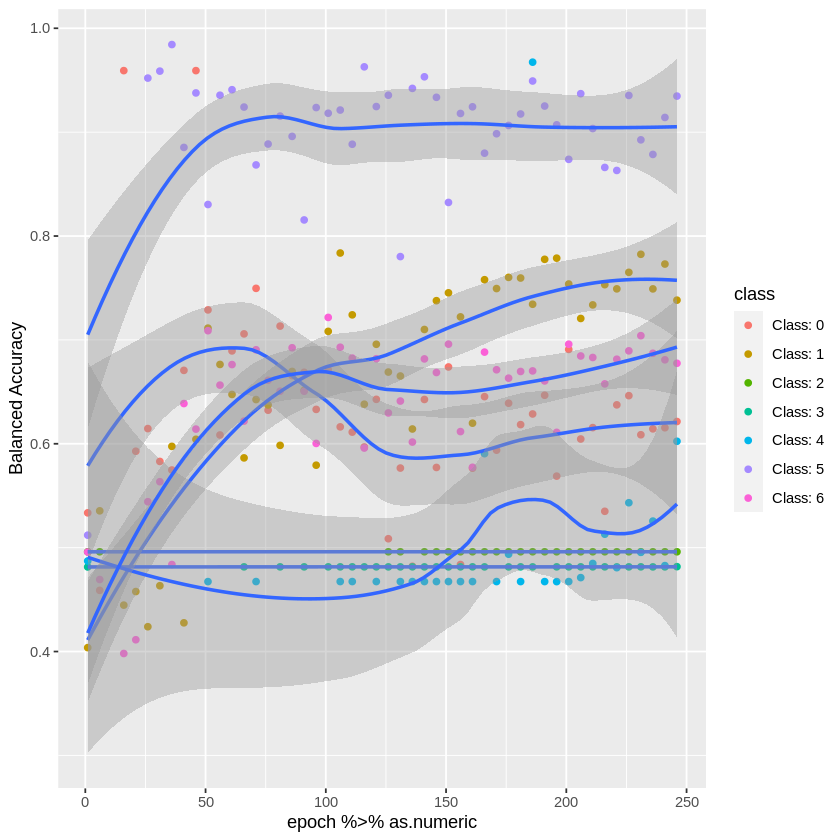

In [36]:
# by_class_accuracy_dt[order(epoch %>% as.numeric)] %>%
#   ggplot(aes(x=epoch %>% as.numeric,y=`Balanced Accuracy`,group = class))+
#   geom_point(aes(color=class))+
#   geom_smooth()

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


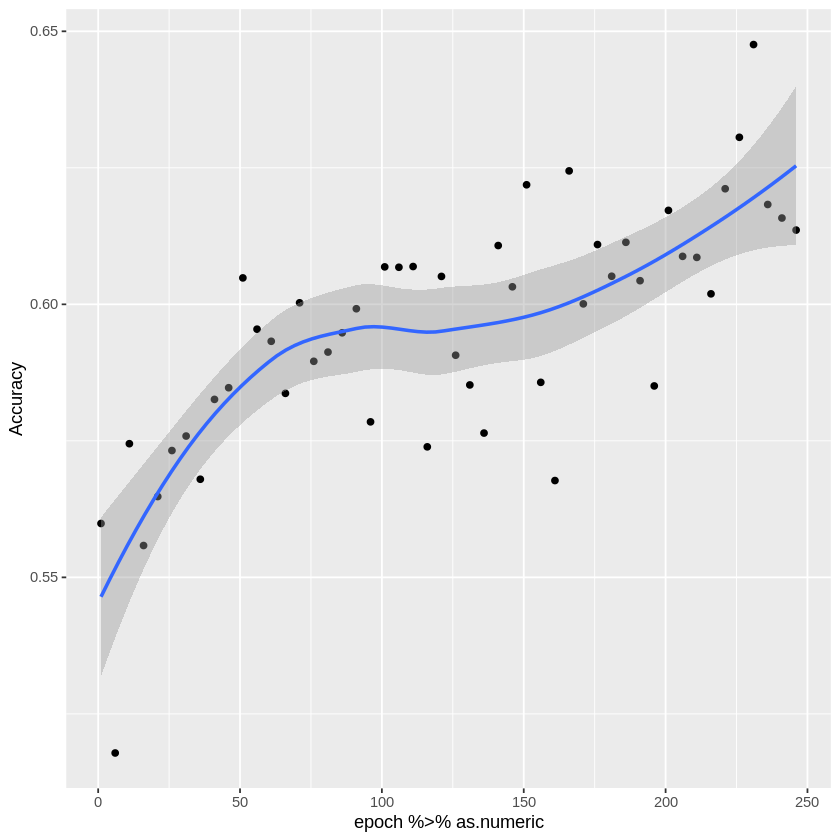

In [37]:
# accuracy_dt[order(epoch %>% as.numeric)] %>%
#   ggplot(aes(x=epoch %>% as.numeric,y=Accuracy))+
#   geom_point()+
#   geom_smooth()

Batch 2

In [38]:
# # batch
# confusion_id_dt_01_batch22 <-
# 1:nrow(id_dt_01_batch2) %>%
#   lapply(function(x){
#   # cat("Processing path: ", batch2[x,]$predict_path, "\n")
#   predict_rast <- stack(id_dt_01_batch2[x,]$predict_path)
#   label_rast <- stack(id_dt_01_batch2[x,]$label_path)

#   out_dt <- data.table(
#   prediction = values(predict_rast) %>% unlist,
#   label = values(label_rast) %>% unlist
#     )
#   names(out_dt) <- c('prediction', 'label')
#   out_dt$epoch <- id_dt_01_batch2[x,]$epoch
#   out_dt$tile_id <- id_dt_01_batch2[x,]$tile_id
#     return(out_dt)
#   }) %>% rbindlist


In [39]:
# confusion_id_dt_01_batch22[,prediction:=factor(prediction %>% paste() %>% paste())]
# confusion_id_dt_01_batch22[,label:=factor(label %>% paste() %>% paste())]
# confusion_id_dt_01_batch22$prediction %>% levels
# confusion_id_dt_01_batch22$label %>%levels
# confusion_id_dt_01_batch22 <- confusion_id_dt_01_batch22 %>%
#   mutate(label = as.numeric(as.character(label))-1)
# confusion_id_dt_01_batch22$label <- factor(confusion_id_dt_01_batch22$label, levels = 0:6)
# levels(confusion_id_dt_01_batch22$prediction)
# levels(confusion_id_dt_01_batch22$label)

[1] "0" "1" "2" "3" "4" "5" "6"

[1] "1" "2" "3" "4" "5" "6" "7"

[1] "0" "1" "2" "3" "4" "5" "6"

[1] "0" "1" "2" "3" "4" "5" "6"

In [40]:
# accuracy_dt<-
#   unique(confusion_id_dt_01_batch22$epoch) %>%
# lapply(function(x){
#   conf_dt <- confusion_id_dt_01_batch22[epoch ==x,]
#   # print(conf_dt)
#  out_dt <-  confusionMatrix(conf_dt$label,conf_dt$prediction)$overall %>% t %>%  data.table
#  out_dt$epoch <- x
#  return(out_dt)
# }) %>% rbindlist
# by_class_accuracy_dt<-
#   unique(confusion_id_dt_01_batch22$epoch) %>%
# lapply(function(x){
#   conf_dt <- confusion_id_dt_01_batch22[epoch ==x,]
#   conf_mtrx <- confusionMatrix(conf_dt$label,conf_dt$prediction)
#  out_dt <-  confusionMatrix(conf_dt$label,conf_dt$prediction)$overall %>% t %>%  data.table

# out_dt <- conf_mtrx$byClass %>% data.table
# out_dt$class <- row.names(conf_mtrx$byClass)
#  out_dt$epoch <- x
#  return(out_dt)
# }) %>% rbindlist

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


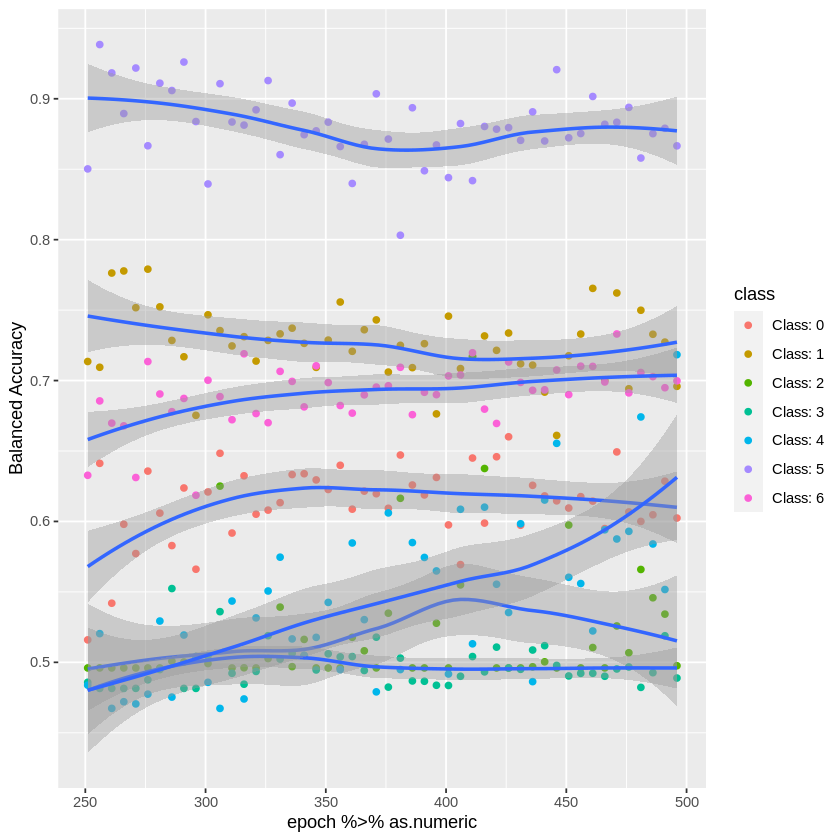

In [41]:
# by_class_accuracy_dt[order(epoch %>% as.numeric)] %>%
#   ggplot(aes(x=epoch %>% as.numeric,y=`Balanced Accuracy`,group = class))+
#   geom_point(aes(color=class))+
#   geom_smooth()

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


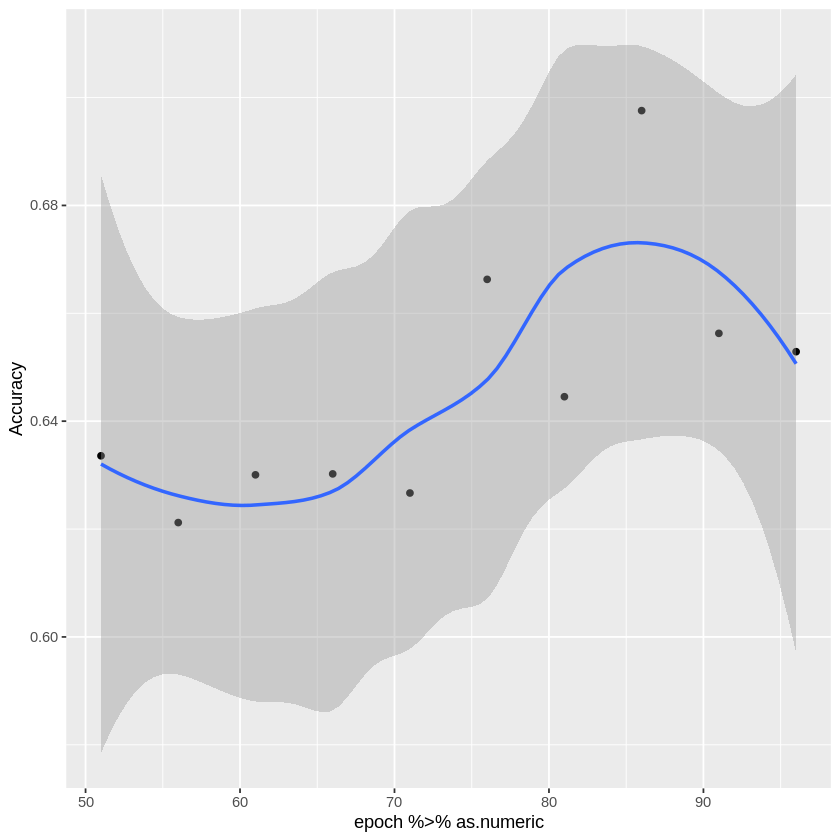

In [ ]:
# accuracy_dt[order(epoch %>% as.numeric)] %>%
#   ggplot(aes(x=epoch %>% as.numeric,y=Accuracy))+
#   geom_point()+
#   geom_smooth()

Attempt to run the whole dataset. all 1000

In [18]:
# id_dt_01_ordered has 1000 rows
num_rows1

[1] 1000

In [19]:
confusion_id_dt_01_ordered <-
1:nrow(id_dt_01_ordered) %>%
  lapply(function(x){
  # cat("Processing path: ", batch3[x,]$predict_path, "\n")
  predict_rast <- stack(id_dt_01_ordered[x,]$predict_path)
  label_rast <- stack(id_dt_01_ordered[x,]$label_path)

  out_dt <- data.table(
  prediction = values(predict_rast) %>% unlist,
  label = values(label_rast) %>% unlist
    )
  names(out_dt) <- c('prediction', 'label')
  out_dt$epoch <- id_dt_01_ordered[x,]$epoch
  out_dt$tile_id <- id_dt_01_ordered[x,]$tile_id
    return(out_dt)
  }) %>% rbindlist

In [20]:
confusion_id_dt_01_ordered[,prediction:=factor(prediction %>% paste() %>% paste())]
confusion_id_dt_01_ordered[,label:=factor(label %>% paste() %>% paste())]
confusion_id_dt_01_ordered$prediction %>% levels
confusion_id_dt_01_ordered$label %>%levels
confusion_id_dt_01_ordered <- confusion_id_dt_01_ordered %>%
  mutate(label = as.numeric(as.character(label))-1)
confusion_id_dt_01_ordered$label <- factor(confusion_id_dt_01_ordered$label, levels = 0:6)
levels(confusion_id_dt_01_ordered$prediction)
levels(confusion_id_dt_01_ordered$label)

[1] "0" "1" "2" "3" "4" "5" "6"

[1] "1" "2" "3" "4" "5" "6" "7"

[1] "0" "1" "2" "3" "4" "5" "6"

[1] "0" "1" "2" "3" "4" "5" "6"

In [110]:
confusion_id_dt_01_ordered %>% head

prediction,label,epoch,tile_id
<fct>,<fct>,<int>,<chr>
6,6,1,1472
6,6,1,1472
6,6,1,1472
6,6,1,1472
6,6,1,1472
6,6,1,1472


In [63]:
accuracy_dt_01<-
  unique(confusion_id_dt_01_ordered$epoch) %>%
lapply(function(x){
  conf_dt <- confusion_id_dt_01_ordered[epoch ==x,]
  # print(conf_dt)
 out_dt <-  confusionMatrix(conf_dt$label,conf_dt$prediction)$overall %>% t %>%  data.table
 out_dt$epoch <- x
 return(out_dt)
}) %>% rbindlist

In [62]:
by_class_accuracy_dt_01<-
  unique(confusion_id_dt_01_ordered$epoch) %>%
lapply(function(x){
  conf_dt <- confusion_id_dt_01_ordered[epoch ==x,]
  conf_mtrx <- confusionMatrix(conf_dt$label,conf_dt$prediction)
 out_dt <-  confusionMatrix(conf_dt$label,conf_dt$prediction)$overall %>% t %>%  data.table

out_dt <- conf_mtrx$byClass %>% data.table
out_dt$class <- row.names(conf_mtrx$byClass)
 out_dt$epoch <- x
 return(out_dt)
}) %>% rbindlist

In [30]:
# c("Pond", "Emergent Wetland", "Aquatic Bed", "Shrub Wetland", "Forested Wetland", "Open Water", "Other")
# class = c("Class: 0", "Class: 1", "Class: 2","Class: 3","Class: 4","Class: 5","Class: 6")

[1] "Pond"             "Emergent Wetland" "Aquatic Bed"      "Shrub Wetland"   
[5] "Forested Wetland" "Open Water"       "Other"

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“Removed 69 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 69 rows containing missing values (`geom_point()`).”


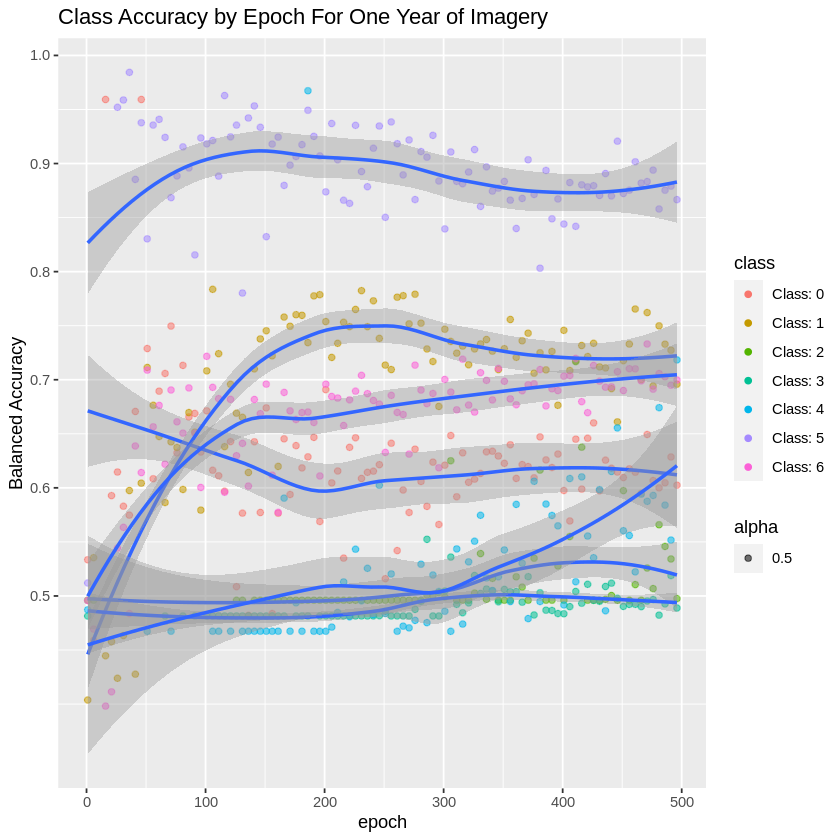

In [107]:
by_class_accuracy_dt_01 %>%
  ggplot(aes(x=epoch,y=`Balanced Accuracy`,group = class))+
  geom_point(aes(color=class, alpha = 0.5))+
  labs(title = "Class Accuracy by Epoch For One Year of Imagery")+
  ylim(0.5,1)+
  scale_y_continuous(breaks = c(0.5, 0.6, 0.7, 0.8, 0.9, 1)) +
  geom_smooth()

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


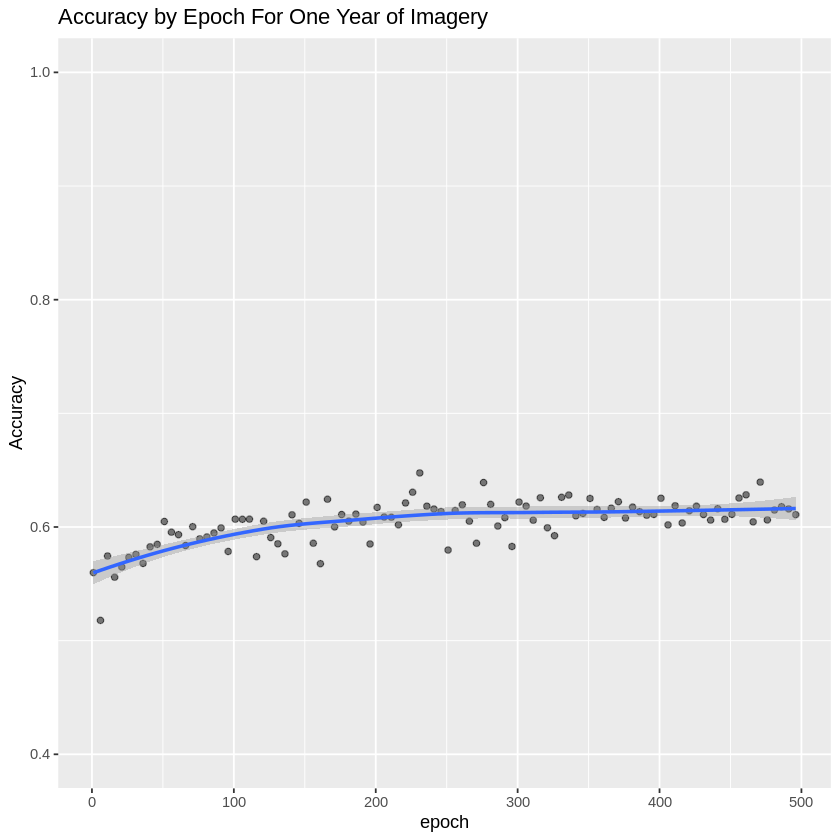

In [93]:
accuracy_dt_01 %>%
  ggplot(aes(x=epoch,y=Accuracy))+
  geom_point(alpha = 0.5)+
  labs(title = "Accuracy by Epoch For One Year of Imagery")+
  ylim(0.4,1)+
  geom_smooth()


### Great! it worked for all the data. now lets batch it to 100 to improve the plots. then redo all with better plots.

In [51]:
id_dt_01_ordered[, batch := cut(seq_len(nrow(id_dt_01_ordered)), breaks=10, labels = FALSE)]
batches <- split(id_dt_01_ordered, id_dt_01_ordered$batch)
id_dt_01_batch1 <- batches[[1]]
id_dt_01_batch2 <- batches[[2]]
id_dt_01_batch3 <- batches[[3]]
id_dt_01_batch4 <- batches[[4]]
id_dt_01_batch5 <- batches[[5]]
id_dt_01_batch6 <- batches[[6]]
id_dt_01_batch7 <- batches[[7]]
id_dt_01_batch8 <- batches[[8]]
id_dt_01_batch9 <- batches[[9]]
id_dt_01_batch10 <- batches[[10]]

In [52]:
confusion_dt_example <-
1:nrow(id_dt_01_batch1) %>%
  lapply(function(x){
  # cat("Processing path: ", batch3[x,]$predict_path, "\n")
  predict_rast <- stack(id_dt_01_batch1[x,]$predict_path)
  label_rast <- stack(id_dt_01_batch1[x,]$label_path)

  out_dt <- data.table(
  prediction = values(predict_rast) %>% unlist,
  label = values(label_rast) %>% unlist
    )
  names(out_dt) <- c('prediction', 'label')
  out_dt$epoch <- id_dt_01_batch1[x,]$epoch
  out_dt$tile_id <- id_dt_01_batch1[x,]$tile_id
    return(out_dt)
  }) %>% rbindlist

confusion_dt_example[,prediction:=factor(prediction %>% paste() %>% paste())]
confusion_dt_example[,label:=factor(label %>% paste() %>% paste())]
confusion_dt_example$prediction %>% levels
confusion_dt_example$label %>%levels
confusion_dt_example <- confusion_dt_example %>%
  mutate(label = as.numeric(as.character(label))-1)
confusion_dt_example$label <- factor(confusion_dt_example$label, levels = 0:6)
levels(confusion_dt_example$prediction)
levels(confusion_dt_example$label)

[1] "0" "1" "2" "3" "4" "5" "6"

[1] "1" "2" "3" "4" "5" "6" "7"

[1] "0" "1" "2" "3" "4" "5" "6"

[1] "0" "1" "2" "3" "4" "5" "6"

In [53]:
accuracy_dt<-
  unique(confusion_dt_example$epoch) %>%
lapply(function(x){
  conf_dt <- confusion_dt_example[epoch ==x,]
  # print(conf_dt)
 out_dt <-  confusionMatrix(conf_dt$label,conf_dt$prediction)$overall %>% t %>%  data.table
 out_dt$epoch <- x
 return(out_dt)
}) %>% rbindlist

In [59]:
accuracy_dt %>% names

[1] "Accuracy"       "Kappa"          "AccuracyLower"  "AccuracyUpper" 
[5] "AccuracyNull"   "AccuracyPValue" "McnemarPValue"  "epoch"

In [ ]:
accuracy_dt

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


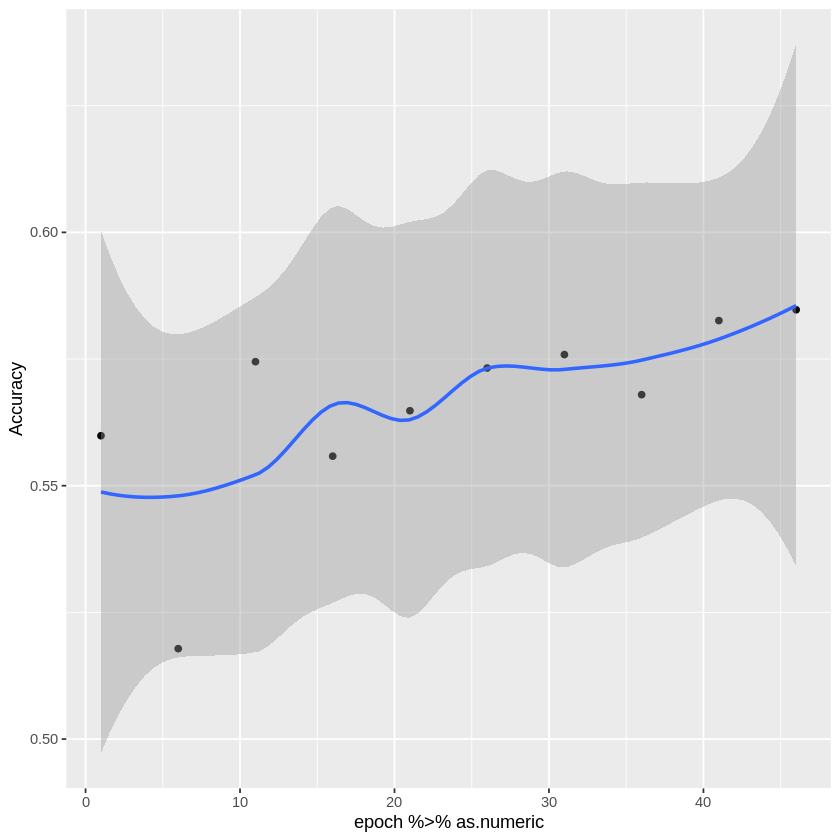

In [54]:
accuracy_dt[order(epoch %>% as.numeric)] %>%
  ggplot(aes(x=epoch %>% as.numeric,y=Accuracy))+
  geom_point()+
  geom_smooth()

In [ ]:
accuracy_dt %>% ggplot(aes())

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


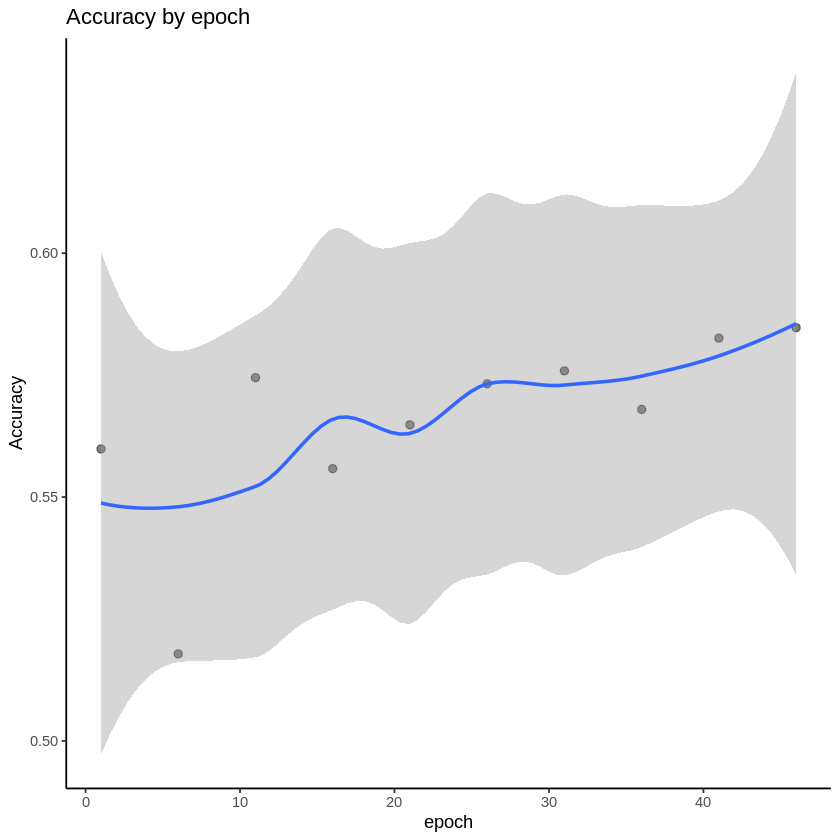

In [128]:
ggplot(data = accuracy_dt, aes(epoch, Accuracy)) +
  geom_point(size = 2, alpha = 0.5) +
    geom_smooth()+
    labs(title = "Accuracy by epoch")+
    theme_classic()

In [147]:
names(accuracy_dt)

[1] "Accuracy"       "Kappa"          "AccuracyLower"  "AccuracyUpper" 
[5] "AccuracyNull"   "AccuracyPValue" "McnemarPValue"  "epoch"

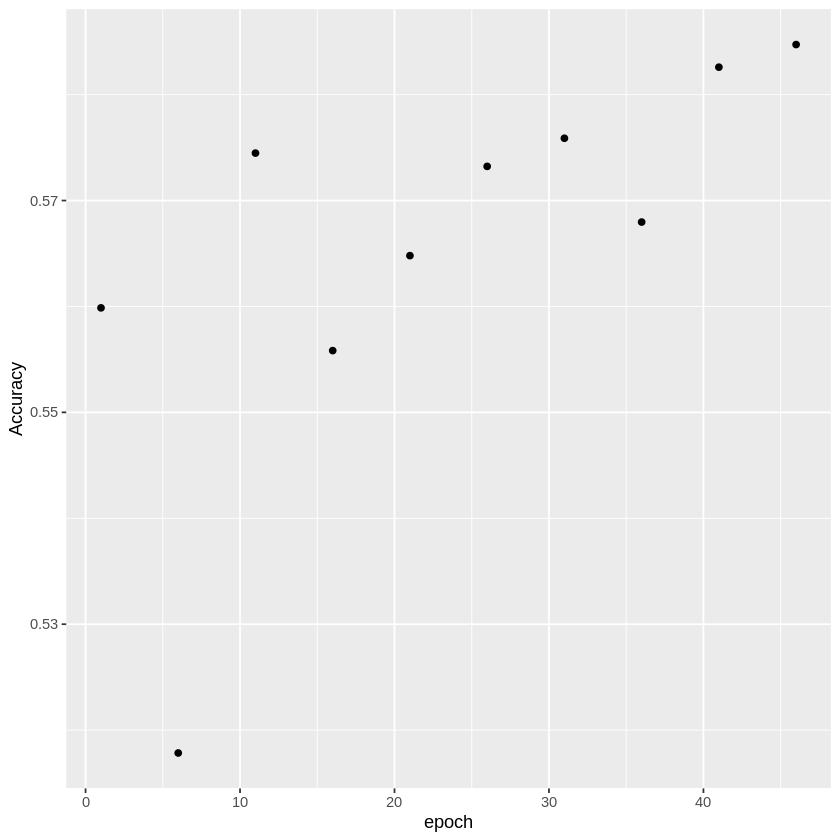

In [148]:
accuracy_dt %>%
  ggplot(aes(epoch, Accuracy))+
    geom_point()

In [1]:
names(confusion_dt_example)

ERROR: Error in eval(expr, envir, enclos): object 'confusion_dt_example' not found


In [55]:
by_class_accuracy_dt<-
  unique(confusion_dt_example$epoch) %>%
lapply(function(x){
  conf_dt <- confusion_dt_example[epoch ==x,]
  conf_mtrx <- confusionMatrix(conf_dt$label,conf_dt$prediction)
 out_dt <-  confusionMatrix(conf_dt$label,conf_dt$prediction)$overall %>% t %>%  data.table

out_dt <- conf_mtrx$byClass %>% data.table
out_dt$class <- row.names(conf_mtrx$byClass)
 out_dt$epoch <- x
 return(out_dt)
}) %>% rbindlist

In [ ]:
by_class_accuracy_dt[order(epoch %>% as.numeric)] %>%
  ggplot(aes(x=epoch %>% as.numeric,y=`Balanced Accuracy`,group = class))+
  geom_point(aes(color=class))+
  geom_smooth()

In [57]:
by_class_accuracy_dt %>% names

[1] "Sensitivity"          "Specificity"          "Pos Pred Value"      
 [4] "Neg Pred Value"       "Precision"            "Recall"              
 [7] "F1"                   "Prevalence"           "Detection Rate"      
[10] "Detection Prevalence" "Balanced Accuracy"    "class"               
[13] "epoch"

In [ ]:
View(by_class_accuracy_dt)

Warning message:
“Removed 33 rows containing missing values (`geom_point()`).”


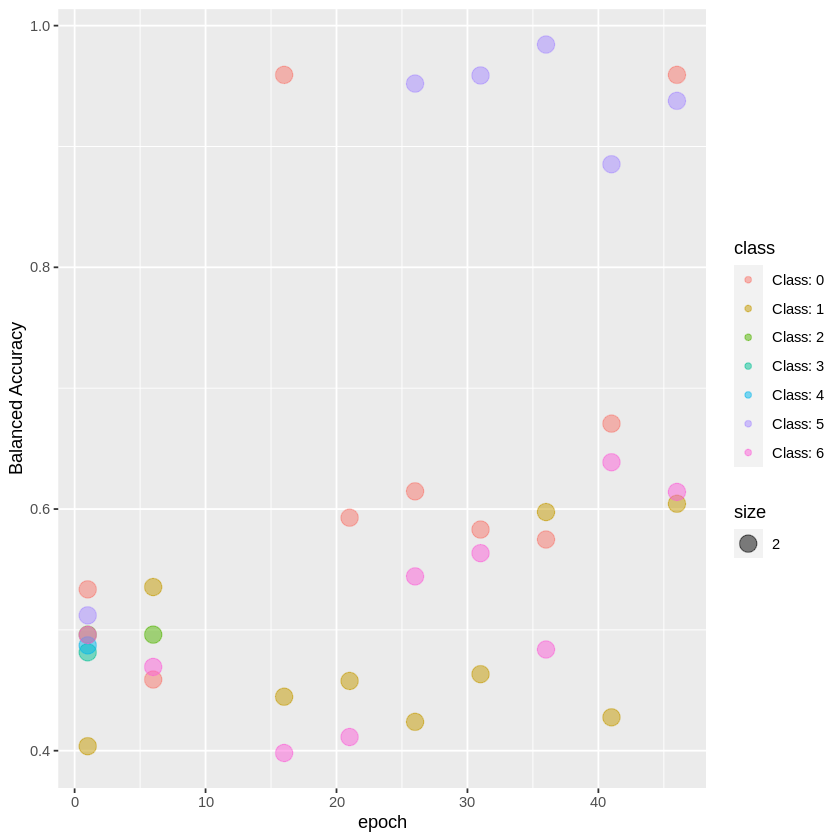

In [124]:
by_class_accuracy_dt %>%
  # ggplot(aes(x=epoch,y=`Balanced Accuracy`,group = class))+
  ggplot(aes(x=epoch,y=`Balanced Accuracy`,group = class))+
  # ggplot(aes(x=epoch,y=`Precision`,group = class))+
  # ggplot(aes(x=epoch,y=`Sensitivity`,group = class))+
  geom_point(alpha = 0.5,(aes(color=class, size = 2)))
  # geom_smooth(method = lm, se = False)

Warning message:
“Removed 33 rows containing missing values (`geom_point()`).”


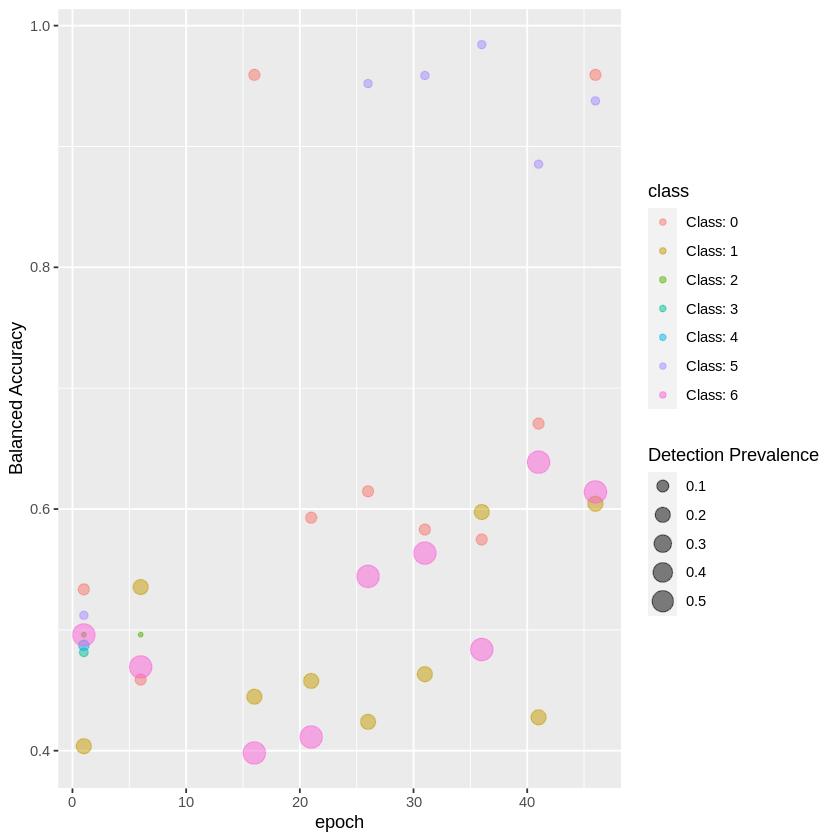

In [141]:
by_class_accuracy_dt %>%
  ggplot(aes(epoch,`Balanced Accuracy`,group = class))+
  geom_point(aes(color = class, size = `Detection Prevalence`), alpha = 0.5)

### id_dt_02_ordered YEAR 2

In [50]:
# batch
confusion_id_dt_02_ordered <-
1:nrow(id_dt_02_ordered) %>%
  lapply(function(x){
  # cat("Processing path: ", batch3[x,]$predict_path, "\n")
  predict_rast <- stack(id_dt_02_ordered[x,]$predict_path)
  label_rast <- stack(id_dt_02_ordered[x,]$label_path)

  out_dt <- data.table(
  prediction = values(predict_rast) %>% unlist,
  label = values(label_rast) %>% unlist
    )
  names(out_dt) <- c('prediction', 'label')
  out_dt$epoch <- id_dt_02_ordered[x,]$epoch
  out_dt$tile_id <- id_dt_02_ordered[x,]$tile_id
    return(out_dt)
  }) %>% rbindlist


In [51]:
confusion_id_dt_02_ordered[,prediction:=factor(prediction %>% paste() %>% paste())]
confusion_id_dt_02_ordered[,label:=factor(label %>% paste() %>% paste())]
confusion_id_dt_02_ordered$prediction %>% levels
confusion_id_dt_02_ordered$label %>%levels
confusion_id_dt_02_ordered <- confusion_id_dt_02_ordered %>%
  mutate(label = as.numeric(as.character(label))-1)
confusion_id_dt_02_ordered$label <- factor(confusion_id_dt_02_ordered$label, levels = 0:6)
levels(confusion_id_dt_02_ordered$prediction)
levels(confusion_id_dt_02_ordered$label)

[1] "0" "1" "2" "3" "4" "5" "6"

[1] "1" "2" "3" "4" "5" "6" "7"

[1] "0" "1" "2" "3" "4" "5" "6"

[1] "0" "1" "2" "3" "4" "5" "6"

In [94]:
by_class_accuracy_dt_02<-
  unique(confusion_id_dt_02_ordered$epoch) %>%
lapply(function(x){
  conf_dt <- confusion_id_dt_02_ordered[epoch ==x,]
  conf_mtrx <- confusionMatrix(conf_dt$label,conf_dt$prediction)
 out_dt <-  confusionMatrix(conf_dt$label,conf_dt$prediction)$overall %>% t %>%  data.table

out_dt <- conf_mtrx$byClass %>% data.table
out_dt$class <- row.names(conf_mtrx$byClass)
 out_dt$epoch <- x
 return(out_dt)
}) %>% rbindlist

In [95]:
accuracy_dt_02<-
  unique(confusion_id_dt_02_ordered$epoch) %>%
lapply(function(x){
  conf_dt <- confusion_id_dt_02_ordered[epoch ==x,]
  # print(conf_dt)
 out_dt <-  confusionMatrix(conf_dt$label,conf_dt$prediction)$overall %>% t %>%  data.table
 out_dt$epoch <- x
 return(out_dt)
}) %>% rbindlist

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“Removed 39 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 39 rows containing missing values (`geom_point()`).”


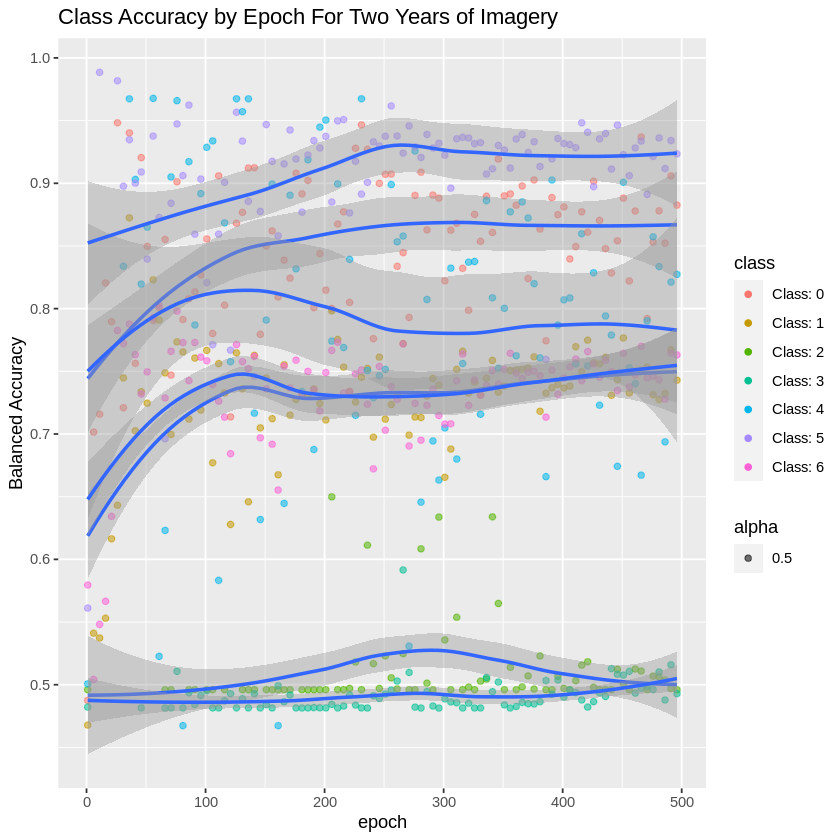

In [106]:
by_class_accuracy_dt_02 %>%
  ggplot(aes(x=epoch,y=`Balanced Accuracy`,group = class))+
  geom_point(aes(color=class, alpha = 0.5))+
  labs(title = "Class Accuracy by Epoch For Two Years of Imagery")+
  ylim(0.5,1)+
  scale_y_continuous(breaks = c(0.5, 0.6, 0.7, 0.8, 0.9, 1)) +
  geom_smooth()

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“Removed 1 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


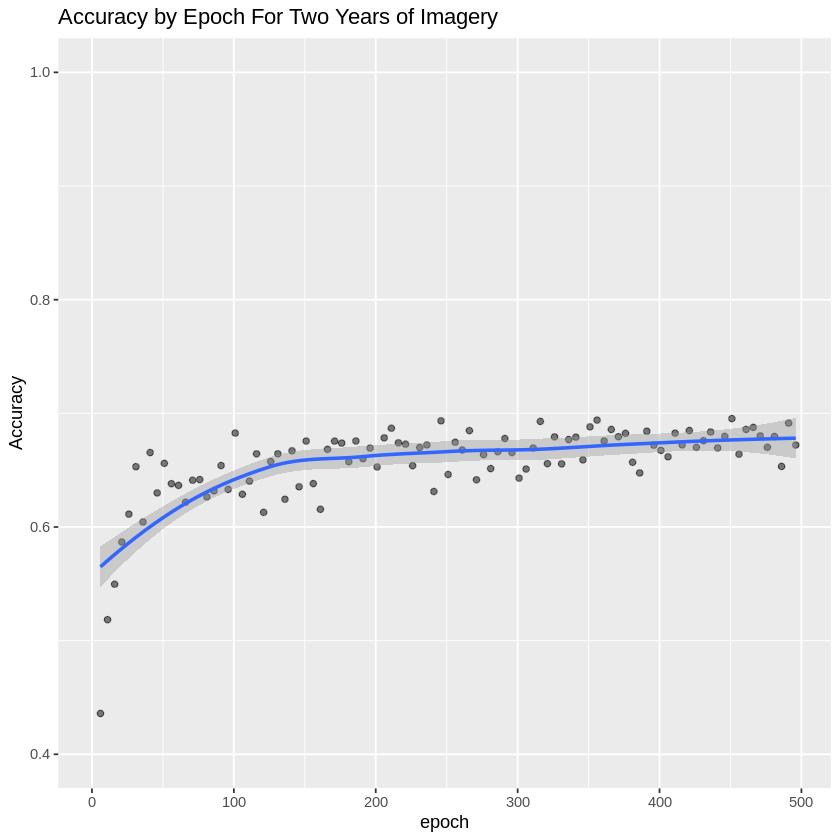

In [97]:
accuracy_dt_02 %>%
  ggplot(aes(x=epoch,y=Accuracy))+
  geom_point(alpha = 0.5)+
  labs(title = "Accuracy by Epoch For Two Years of Imagery")+
  ylim(0.4,1)+
  geom_smooth()

### id_dt_03_ordered YEAR THREE

In [56]:
# batch
confusion_id_dt_03_ordered <-
1:nrow(id_dt_03_ordered) %>%
  lapply(function(x){
  # cat("Processing path: ", batch3[x,]$predict_path, "\n")
  predict_rast <- stack(id_dt_03_ordered[x,]$predict_path)
  label_rast <- stack(id_dt_03_ordered[x,]$label_path)

  out_dt <- data.table(
  prediction = values(predict_rast) %>% unlist,
  label = values(label_rast) %>% unlist
    )
  names(out_dt) <- c('prediction', 'label')
  out_dt$epoch <- id_dt_03_ordered[x,]$epoch
  out_dt$tile_id <- id_dt_03_ordered[x,]$tile_id
    return(out_dt)
  }) %>% rbindlist

In [57]:
confusion_id_dt_03_ordered[,prediction:=factor(prediction %>% paste() %>% paste())]
confusion_id_dt_03_ordered[,label:=factor(label %>% paste() %>% paste())]
confusion_id_dt_03_ordered$prediction %>% levels
confusion_id_dt_03_ordered$label %>%levels
confusion_id_dt_03_ordered <- confusion_id_dt_03_ordered %>%
  mutate(label = as.numeric(as.character(label))-1)
confusion_id_dt_03_ordered$label <- factor(confusion_id_dt_03_ordered$label, levels = 0:6)
levels(confusion_id_dt_03_ordered$prediction)
levels(confusion_id_dt_03_ordered$label)

[1] "0" "1" "2" "3" "4" "5" "6"

[1] "1" "2" "3" "4" "5" "6" "7"

[1] "0" "1" "2" "3" "4" "5" "6"

[1] "0" "1" "2" "3" "4" "5" "6"

In [98]:
by_class_accuracy_dt_03<-
  unique(confusion_id_dt_03_ordered$epoch) %>%
lapply(function(x){
  conf_dt <- confusion_id_dt_03_ordered[epoch ==x,]
  conf_mtrx <- confusionMatrix(conf_dt$label,conf_dt$prediction)
 out_dt <-  confusionMatrix(conf_dt$label,conf_dt$prediction)$overall %>% t %>%  data.table

out_dt <- conf_mtrx$byClass %>% data.table
out_dt$class <- row.names(conf_mtrx$byClass)
 out_dt$epoch <- x
 return(out_dt)
}) %>% rbindlist

In [99]:
accuracy_dt_03<-
  unique(confusion_id_dt_03_ordered$epoch) %>%
lapply(function(x){
  conf_dt <- confusion_id_dt_03_ordered[epoch ==x,]
  # print(conf_dt)
 out_dt <-  confusionMatrix(conf_dt$label,conf_dt$prediction)$overall %>% t %>%  data.table
 out_dt$epoch <- x
 return(out_dt)
}) %>% rbindlist



Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“Removed 46 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 46 rows containing missing values (`geom_point()`).”


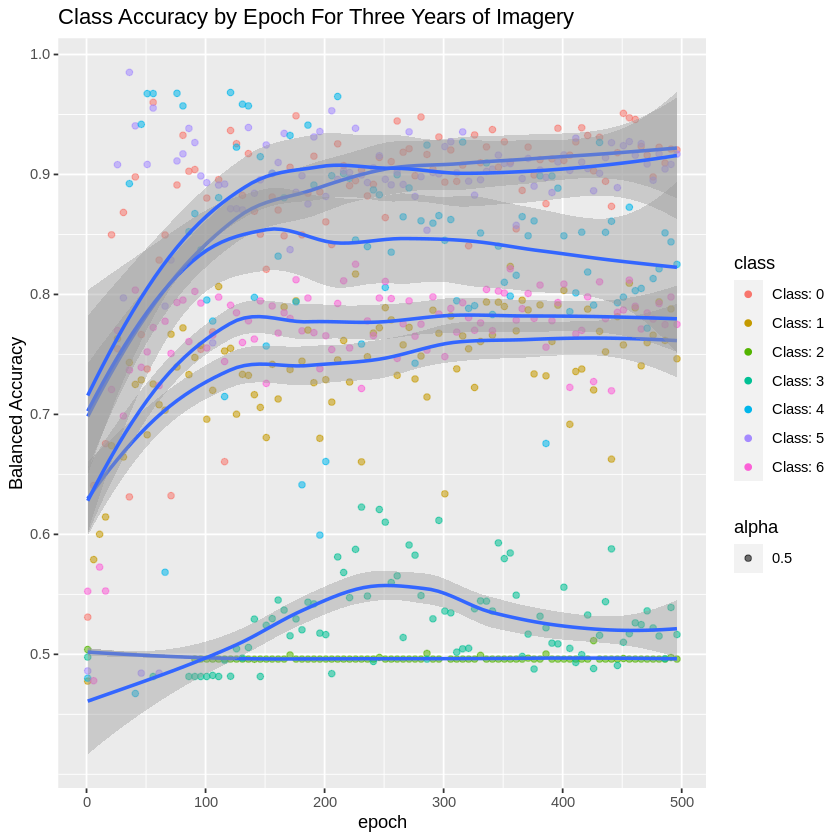

In [105]:
by_class_accuracy_dt_03 %>%
  ggplot(aes(x=epoch,y=`Balanced Accuracy`,group = class))+
  geom_point(aes(color=class, alpha = 0.5))+
  labs(title = "Class Accuracy by Epoch For Three Years of Imagery")+
  ylim(0.5,1)+
  scale_y_continuous(breaks = c(0.5, 0.6, 0.7, 0.8, 0.9, 1)) +
  geom_smooth()

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“Removed 2 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”


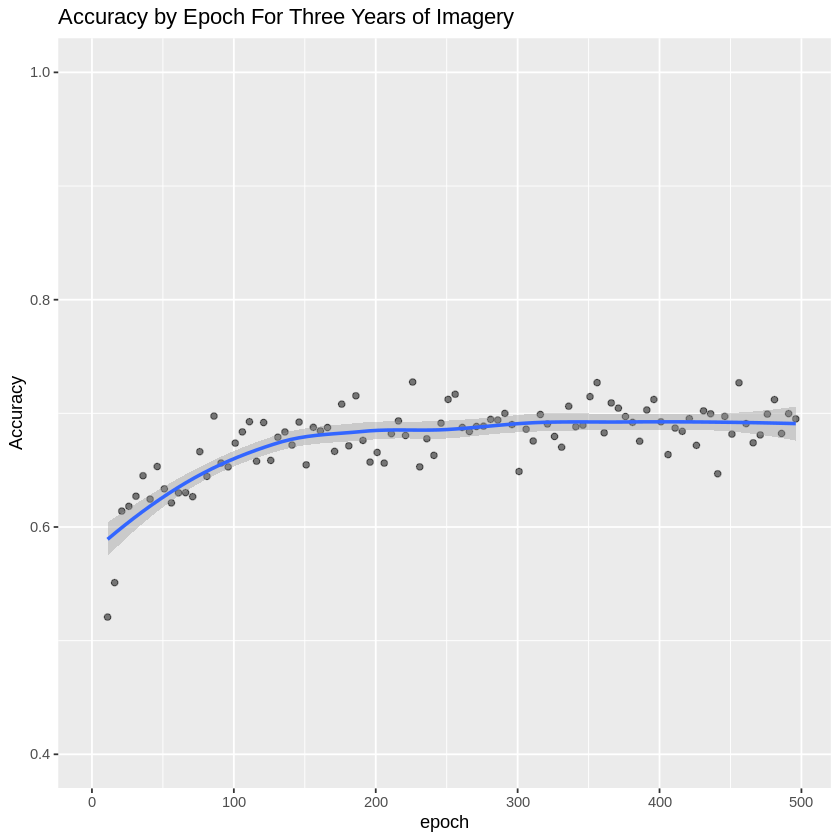

In [102]:
accuracy_dt_03 %>%
  ggplot(aes(x=epoch,y=Accuracy))+
  geom_point(alpha = 0.5)+
  labs(title = "Accuracy by Epoch For Three Years of Imagery")+
  ylim(0.4,1)+
  geom_smooth()

Batch 5

In [ ]:
# batch
confusion_dt_batch5 <-
1:nrow(batch5) %>%
  lapply(function(x){
  # cat("Processing path: ", batch3[x,]$predict_path, "\n")
  predict_rast <- stack(batch5[x,]$predict_path)
  label_rast <- stack(batch5[x,]$label_path)

  out_dt <- data.table(
  prediction = values(predict_rast) %>% unlist,
  label = values(label_rast) %>% unlist
    )
  names(out_dt) <- c('prediction', 'label')
  out_dt$epoch <- batch5[x,]$epoch
  out_dt$tile_id <- batch5[x,]$tile_id
    return(out_dt)
  }) %>% rbindlist

In [ ]:
confusion_dt_batch5[,prediction:=factor(prediction %>% paste() %>% paste())]
confusion_dt_batch5[,label:=factor(label %>% paste() %>% paste())]
confusion_dt_batch5$prediction %>% levels
confusion_dt_batch5$label %>%levels
confusion_dt_batch5 <- confusion_dt_batch5 %>%
  mutate(label = as.numeric(as.character(label))-1)
confusion_dt_batch5$label <- factor(confusion_dt_batch5$label, levels = 0:6)
levels(confusion_dt_batch5$prediction)
levels(confusion_dt_batch5$label)

accuracy_dt<-
  unique(confusion_dt_batch5$epoch) %>%
lapply(function(x){
  conf_dt <- confusion_dt_batch5[epoch ==x,]
  # print(conf_dt)
 out_dt <-  confusionMatrix(conf_dt$label,conf_dt$prediction)$overall %>% t %>%  data.table
 out_dt$epoch <- x
 return(out_dt)
}) %>% rbindlist

by_class_accuracy_dt<-
  unique(confusion_dt_batch5$epoch) %>%
lapply(function(x){
  conf_dt <- confusion_dt_batch5[epoch ==x,]
  conf_mtrx <- confusionMatrix(conf_dt$label,conf_dt$prediction)
 out_dt <-  confusionMatrix(conf_dt$label,conf_dt$prediction)$overall %>% t %>%  data.table

out_dt <- conf_mtrx$byClass %>% data.table
out_dt$class <- row.names(conf_mtrx$byClass)
 out_dt$epoch <- x
 return(out_dt)
}) %>% rbindlist

[1] "0" "1" "2" "3" "4" "5" "6"

[1] "1" "2" "3" "4" "5" "6" "7"

[1] "0" "1" "2" "3" "4" "5" "6"

[1] "0" "1" "2" "3" "4" "5" "6"

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


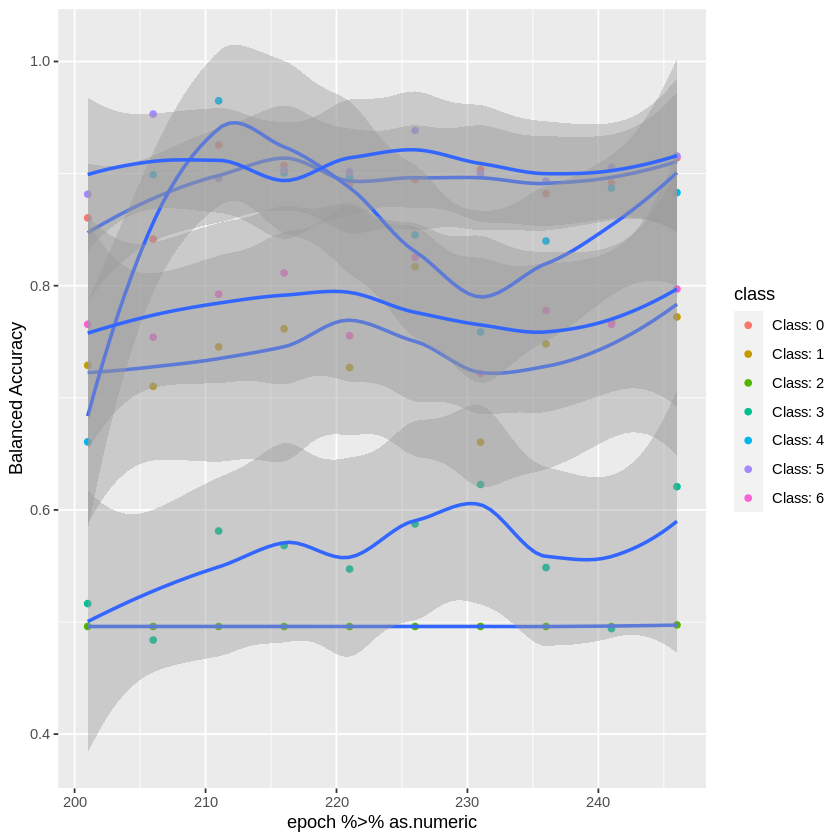

In [ ]:
by_class_accuracy_dt[order(epoch %>% as.numeric)] %>%
  ggplot(aes(x=epoch %>% as.numeric,y=`Balanced Accuracy`,group = class))+
  geom_point(aes(color=class))+
  geom_smooth()

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


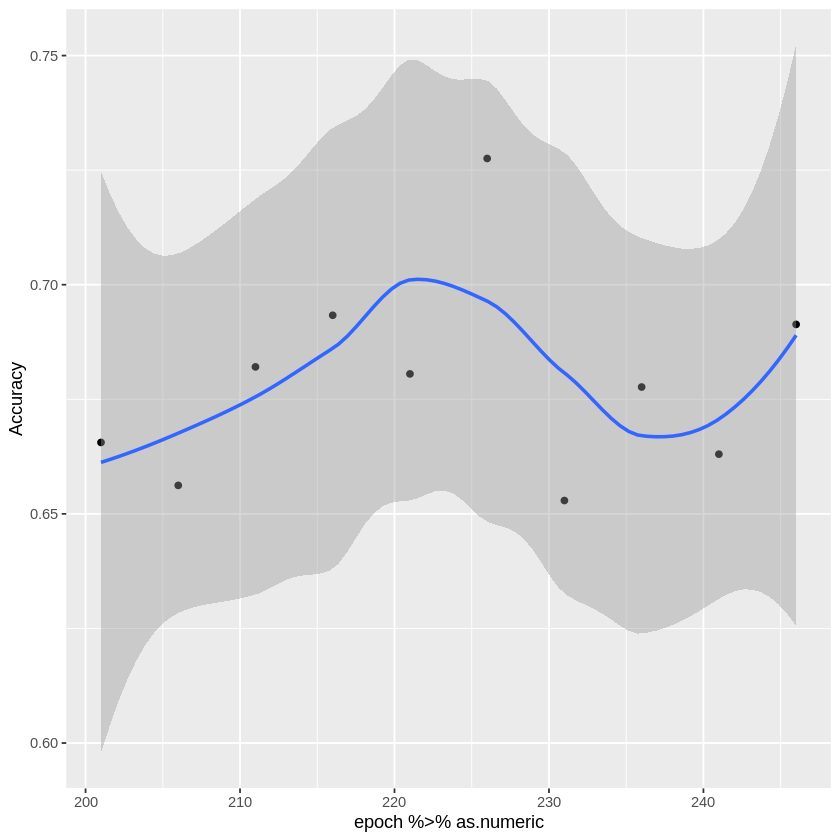

In [ ]:
accuracy_dt[order(epoch %>% as.numeric)] %>%
  ggplot(aes(x=epoch %>% as.numeric,y=Accuracy))+
  geom_point()+
  geom_smooth()

Batch 6

In [ ]:
# batch
confusion_dt_batch6 <-
1:nrow(batch6) %>%
  lapply(function(x){
  # cat("Processing path: ", batch3[x,]$predict_path, "\n")
  predict_rast <- stack(batch6[x,]$predict_path)
  label_rast <- stack(batch6[x,]$label_path)

  out_dt <- data.table(
  prediction = values(predict_rast) %>% unlist,
  label = values(label_rast) %>% unlist
    )
  names(out_dt) <- c('prediction', 'label')
  out_dt$epoch <- batch6[x,]$epoch
  out_dt$tile_id <- batch6[x,]$tile_id
    return(out_dt)
  }) %>% rbindlist

In [ ]:
confusion_dt_batch6[,prediction:=factor(prediction %>% paste() %>% paste())]
confusion_dt_batch6[,label:=factor(label %>% paste() %>% paste())]
confusion_dt_batch6$prediction %>% levels
confusion_dt_batch6$label %>%levels
confusion_dt_batch6 <- confusion_dt_batch6 %>%
  mutate(label = as.numeric(as.character(label))-1)
confusion_dt_batch6$label <- factor(confusion_dt_batch6$label, levels = 0:6)
levels(confusion_dt_batch6$prediction)
levels(confusion_dt_batch6$label)

accuracy_dt<-
  unique(confusion_dt_batch6$epoch) %>%
lapply(function(x){
  conf_dt <- confusion_dt_batch6[epoch ==x,]
  # print(conf_dt)
 out_dt <-  confusionMatrix(conf_dt$label,conf_dt$prediction)$overall %>% t %>%  data.table
 out_dt$epoch <- x
 return(out_dt)
}) %>% rbindlist

by_class_accuracy_dt<-
  unique(confusion_dt_batch6$epoch) %>%
lapply(function(x){
  conf_dt <- confusion_dt_batch6[epoch ==x,]
  conf_mtrx <- confusionMatrix(conf_dt$label,conf_dt$prediction)
 out_dt <-  confusionMatrix(conf_dt$label,conf_dt$prediction)$overall %>% t %>%  data.table

out_dt <- conf_mtrx$byClass %>% data.table
out_dt$class <- row.names(conf_mtrx$byClass)
 out_dt$epoch <- x
 return(out_dt)
}) %>% rbindlist

[1] "0" "1" "2" "3" "4" "5" "6"

[1] "1" "2" "3" "4" "5" "6" "7"

[1] "0" "1" "2" "3" "4" "5" "6"

[1] "0" "1" "2" "3" "4" "5" "6"

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


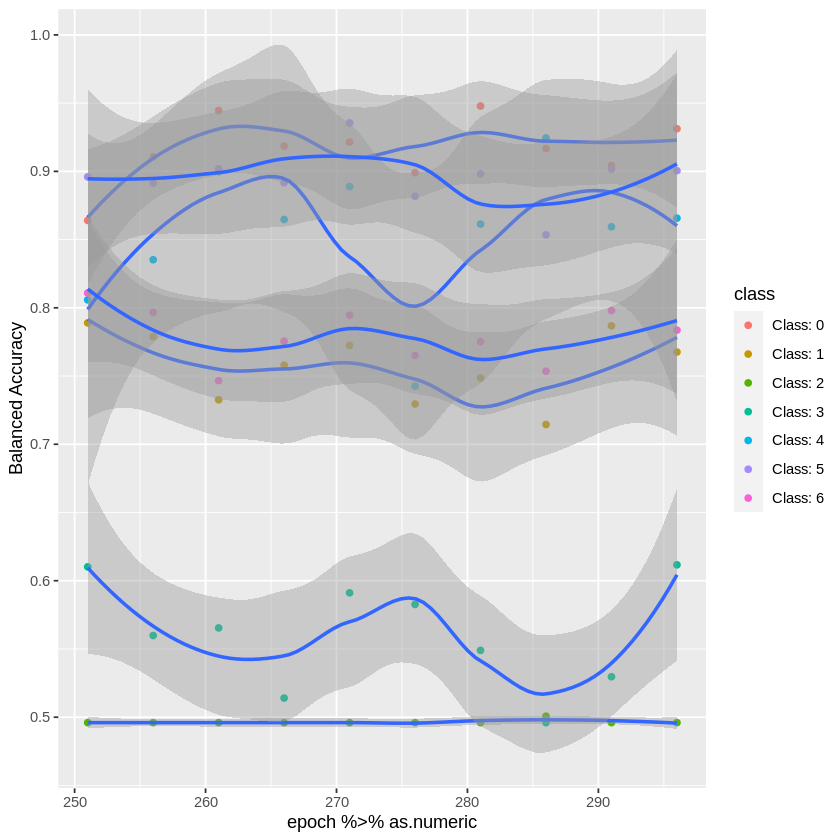

In [ ]:
by_class_accuracy_dt[order(epoch %>% as.numeric)] %>%
  ggplot(aes(x=epoch %>% as.numeric,y=`Balanced Accuracy`,group = class))+
  geom_point(aes(color=class))+
  geom_smooth()

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


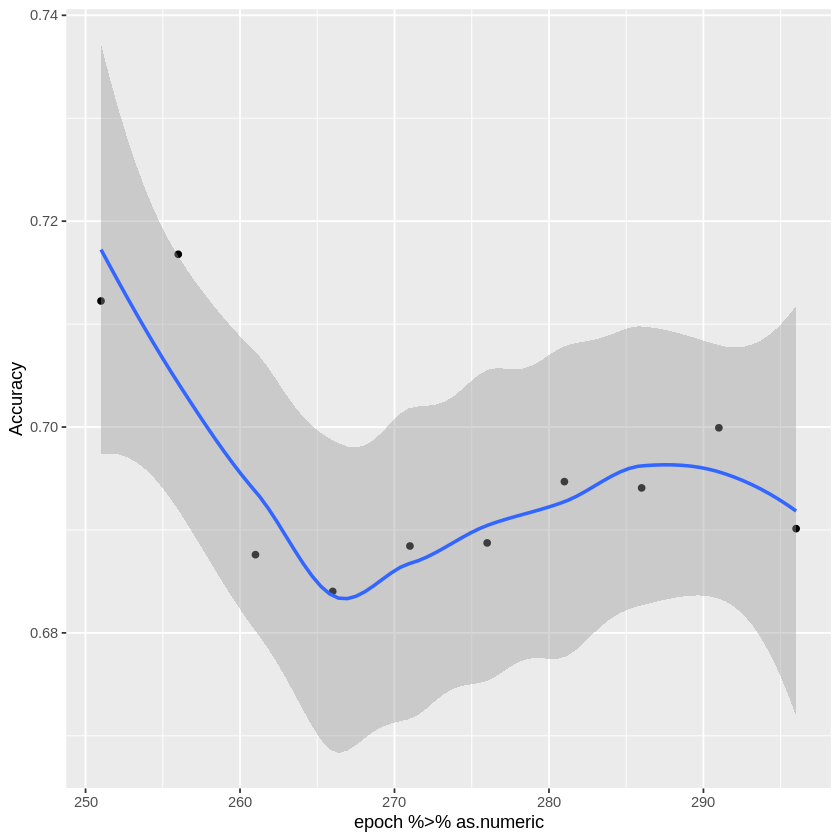

In [ ]:
accuracy_dt[order(epoch %>% as.numeric)] %>%
  ggplot(aes(x=epoch %>% as.numeric,y=Accuracy))+
  geom_point()+
  geom_smooth()

Batch 7

In [ ]:
# batch
confusion_dt_batch7 <-
1:nrow(batch7) %>%
  lapply(function(x){
  # cat("Processing path: ", batch3[x,]$predict_path, "\n")
  predict_rast <- stack(batch7[x,]$predict_path)
  label_rast <- stack(batch7[x,]$label_path)

  out_dt <- data.table(
  prediction = values(predict_rast) %>% unlist,
  label = values(label_rast) %>% unlist
    )
  names(out_dt) <- c('prediction', 'label')
  out_dt$epoch <- batch7[x,]$epoch
  out_dt$tile_id <- batch7[x,]$tile_id
    return(out_dt)
  }) %>% rbindlist

In [ ]:
confusion_dt_batch7[,prediction:=factor(prediction %>% paste() %>% paste())]
confusion_dt_batch7[,label:=factor(label %>% paste() %>% paste())]
confusion_dt_batch7$prediction %>% levels
confusion_dt_batch7$label %>%levels
confusion_dt_batch7 <- confusion_dt_batch7 %>%
  mutate(label = as.numeric(as.character(label))-1)
confusion_dt_batch7$label <- factor(confusion_dt_batch7$label, levels = 0:6)
levels(confusion_dt_batch7$prediction)
levels(confusion_dt_batch7$label)

accuracy_dt<-
  unique(confusion_dt_batch7$epoch) %>%
lapply(function(x){
  conf_dt <- confusion_dt_batch7[epoch ==x,]
  # print(conf_dt)
 out_dt <-  confusionMatrix(conf_dt$label,conf_dt$prediction)$overall %>% t %>%  data.table
 out_dt$epoch <- x
 return(out_dt)
}) %>% rbindlist

by_class_accuracy_dt<-
  unique(confusion_dt_batch7$epoch) %>%
lapply(function(x){
  conf_dt <- confusion_dt_batch7[epoch ==x,]
  conf_mtrx <- confusionMatrix(conf_dt$label,conf_dt$prediction)
 out_dt <-  confusionMatrix(conf_dt$label,conf_dt$prediction)$overall %>% t %>%  data.table

out_dt <- conf_mtrx$byClass %>% data.table
out_dt$class <- row.names(conf_mtrx$byClass)
 out_dt$epoch <- x
 return(out_dt)
}) %>% rbindlist

[1] "0" "1" "2" "3" "4" "5" "6"

[1] "1" "2" "3" "4" "5" "6" "7"

[1] "0" "1" "2" "3" "4" "5" "6"

[1] "0" "1" "2" "3" "4" "5" "6"

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“Removed 1 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


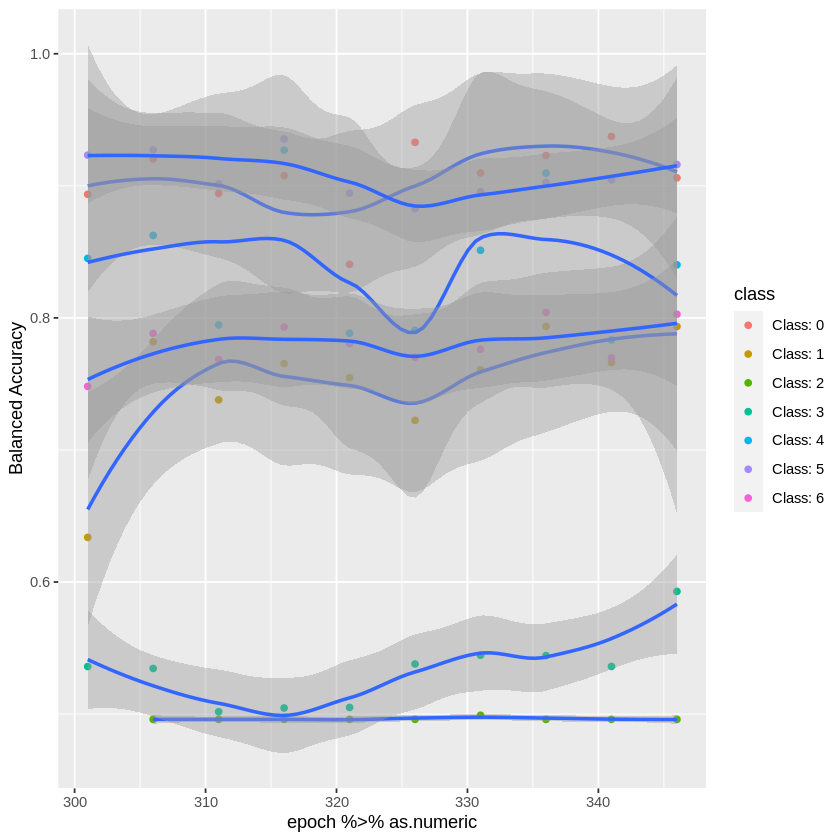

In [ ]:
by_class_accuracy_dt[order(epoch %>% as.numeric)] %>%
  ggplot(aes(x=epoch %>% as.numeric,y=`Balanced Accuracy`,group = class))+
  geom_point(aes(color=class))+
  geom_smooth()

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


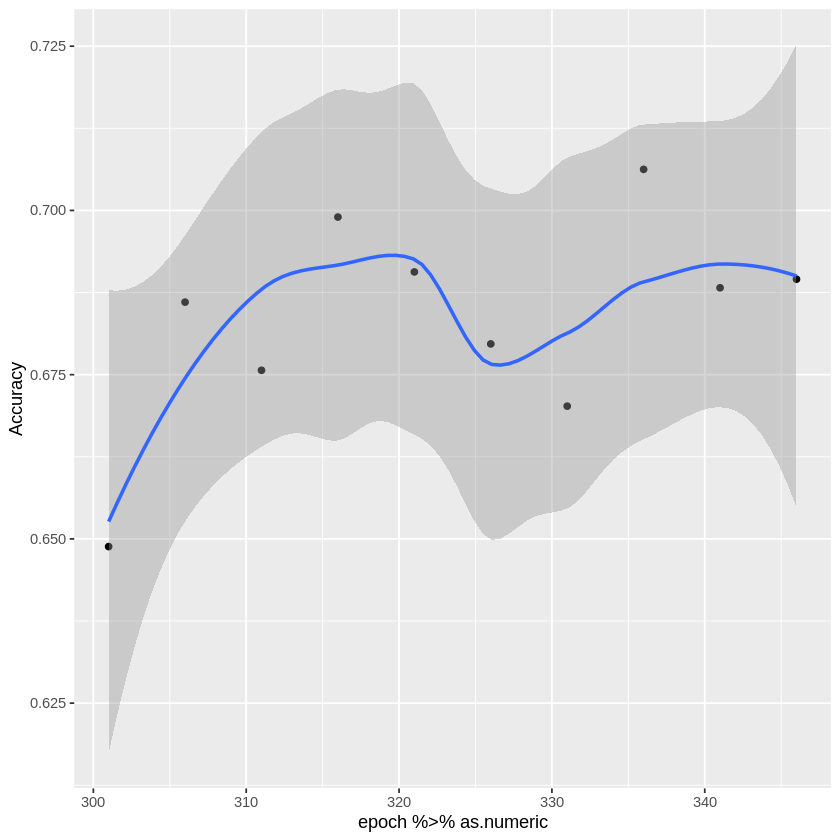

In [ ]:
accuracy_dt[order(epoch %>% as.numeric)] %>%
  ggplot(aes(x=epoch %>% as.numeric,y=Accuracy))+
  geom_point()+
  geom_smooth()

Batch 8

In [ ]:
# batch
confusion_dt_batch8 <-
1:nrow(batch8) %>%
  lapply(function(x){
  # cat("Processing path: ", batch3[x,]$predict_path, "\n")
  predict_rast <- stack(batch8[x,]$predict_path)
  label_rast <- stack(batch8[x,]$label_path)

  out_dt <- data.table(
  prediction = values(predict_rast) %>% unlist,
  label = values(label_rast) %>% unlist
    )
  names(out_dt) <- c('prediction', 'label')
  out_dt$epoch <- batch8[x,]$epoch
  out_dt$tile_id <- batch8[x,]$tile_id
    return(out_dt)
  }) %>% rbindlist

In [ ]:
confusion_dt_batch8[,prediction:=factor(prediction %>% paste() %>% paste())]
confusion_dt_batch8[,label:=factor(label %>% paste() %>% paste())]
confusion_dt_batch8$prediction %>% levels
confusion_dt_batch8$label %>%levels
confusion_dt_batch8 <- confusion_dt_batch8 %>%
  mutate(label = as.numeric(as.character(label))-1)
confusion_dt_batch8$label <- factor(confusion_dt_batch8$label, levels = 0:6)
levels(confusion_dt_batch8$prediction)
levels(confusion_dt_batch8$label)

accuracy_dt<-
  unique(confusion_dt_batch8$epoch) %>%
lapply(function(x){
  conf_dt <- confusion_dt_batch8[epoch ==x,]
  # print(conf_dt)
 out_dt <-  confusionMatrix(conf_dt$label,conf_dt$prediction)$overall %>% t %>%  data.table
 out_dt$epoch <- x
 return(out_dt)
}) %>% rbindlist

by_class_accuracy_dt<-
  unique(confusion_dt_batch8$epoch) %>%
lapply(function(x){
  conf_dt <- confusion_dt_batch8[epoch ==x,]
  conf_mtrx <- confusionMatrix(conf_dt$label,conf_dt$prediction)
 out_dt <-  confusionMatrix(conf_dt$label,conf_dt$prediction)$overall %>% t %>%  data.table

out_dt <- conf_mtrx$byClass %>% data.table
out_dt$class <- row.names(conf_mtrx$byClass)
 out_dt$epoch <- x
 return(out_dt)
}) %>% rbindlist

[1] "0" "1" "2" "3" "4" "5" "6"

[1] "1" "2" "3" "4" "5" "6" "7"

[1] "0" "1" "2" "3" "4" "5" "6"

[1] "0" "1" "2" "3" "4" "5" "6"

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


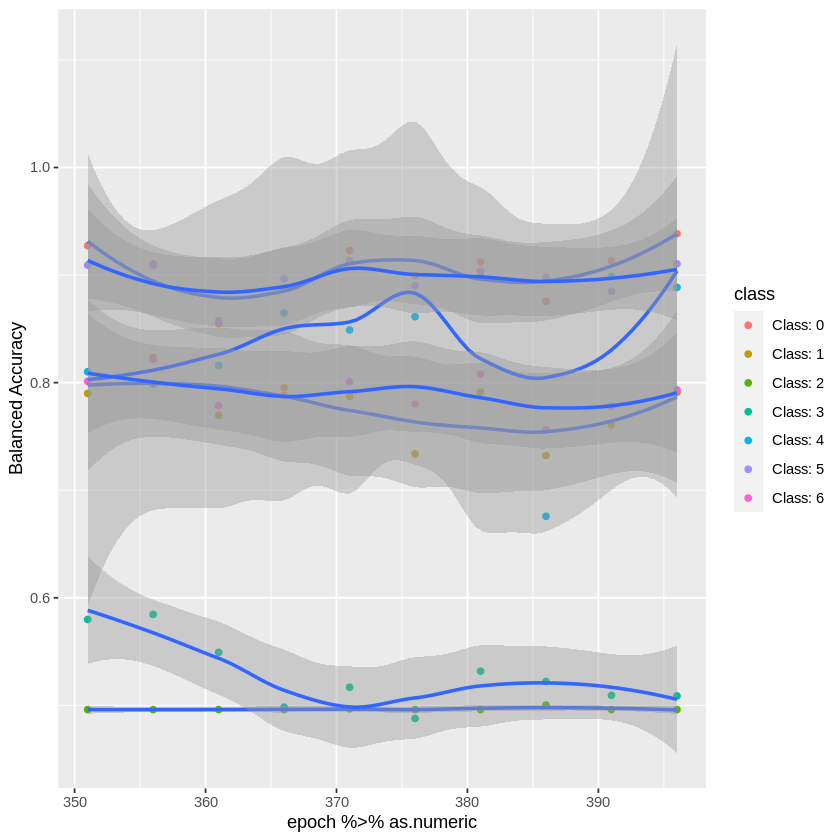

In [ ]:
by_class_accuracy_dt[order(epoch %>% as.numeric)] %>%
  ggplot(aes(x=epoch %>% as.numeric,y=`Balanced Accuracy`,group = class))+
  geom_point(aes(color=class))+
  geom_smooth()

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


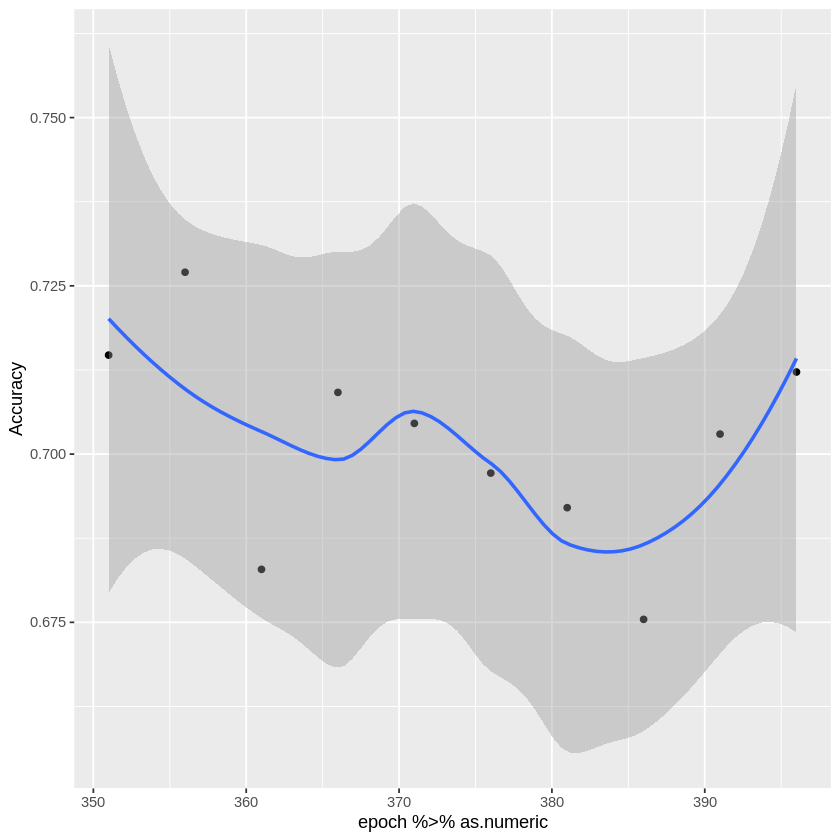

In [ ]:
accuracy_dt[order(epoch %>% as.numeric)] %>%
  ggplot(aes(x=epoch %>% as.numeric,y=Accuracy))+
  geom_point()+
  geom_smooth()

Batch 9

In [ ]:
# batch
confusion_dt_batch9 <-
1:nrow(batch9) %>%
  lapply(function(x){
  # cat("Processing path: ", batch3[x,]$predict_path, "\n")
  predict_rast <- stack(batch9[x,]$predict_path)
  label_rast <- stack(batch9[x,]$label_path)

  out_dt <- data.table(
  prediction = values(predict_rast) %>% unlist,
  label = values(label_rast) %>% unlist
    )
  names(out_dt) <- c('prediction', 'label')
  out_dt$epoch <- batch9[x,]$epoch
  out_dt$tile_id <- batch9[x,]$tile_id
    return(out_dt)
  }) %>% rbindlist

In [ ]:
confusion_dt_batch9[,prediction:=factor(prediction %>% paste() %>% paste())]
confusion_dt_batch9[,label:=factor(label %>% paste() %>% paste())]
confusion_dt_batch9$prediction %>% levels
confusion_dt_batch9$label %>%levels
confusion_dt_batch9 <- confusion_dt_batch9 %>%
  mutate(label = as.numeric(as.character(label))-1)
confusion_dt_batch9$label <- factor(confusion_dt_batch9$label, levels = 0:6)
levels(confusion_dt_batch9$prediction)
levels(confusion_dt_batch9$label)

accuracy_dt<-
  unique(confusion_dt_batch9$epoch) %>%
lapply(function(x){
  conf_dt <- confusion_dt_batch9[epoch ==x,]
  # print(conf_dt)
 out_dt <-  confusionMatrix(conf_dt$label,conf_dt$prediction)$overall %>% t %>%  data.table
 out_dt$epoch <- x
 return(out_dt)
}) %>% rbindlist

by_class_accuracy_dt<-
  unique(confusion_dt_batch9$epoch) %>%
lapply(function(x){
  conf_dt <- confusion_dt_batch9[epoch ==x,]
  conf_mtrx <- confusionMatrix(conf_dt$label,conf_dt$prediction)
 out_dt <-  confusionMatrix(conf_dt$label,conf_dt$prediction)$overall %>% t %>%  data.table

out_dt <- conf_mtrx$byClass %>% data.table
out_dt$class <- row.names(conf_mtrx$byClass)
 out_dt$epoch <- x
 return(out_dt)
}) %>% rbindlist

[1] "0" "1" "2" "3" "4" "5" "6"

[1] "1" "2" "3" "4" "5" "6" "7"

[1] "0" "1" "2" "3" "4" "5" "6"

[1] "0" "1" "2" "3" "4" "5" "6"

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


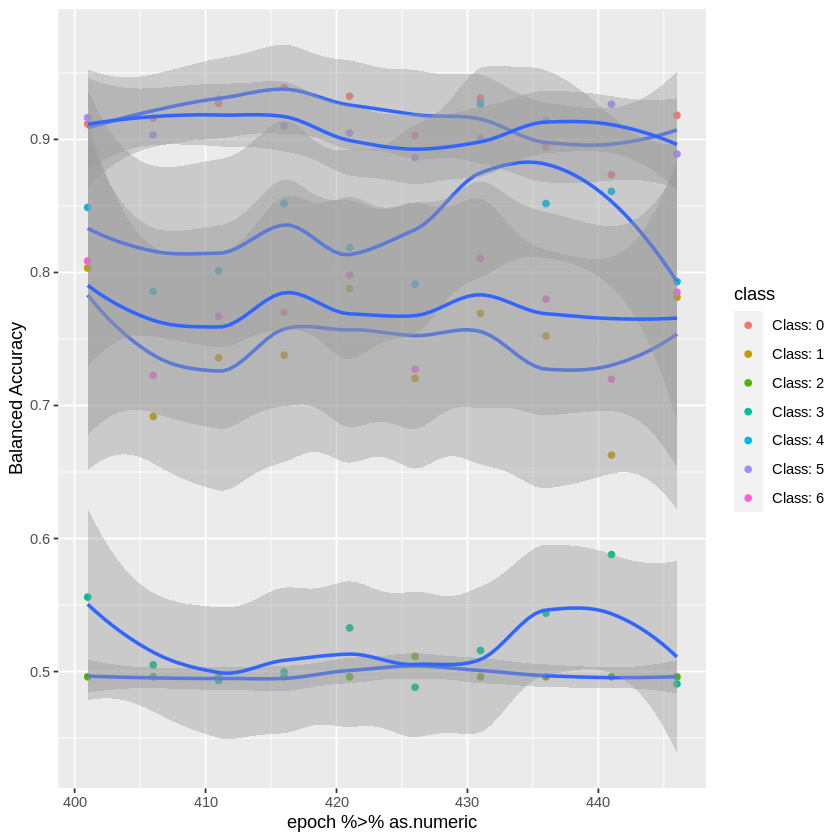

In [ ]:
by_class_accuracy_dt[order(epoch %>% as.numeric)] %>%
  ggplot(aes(x=epoch %>% as.numeric,y=`Balanced Accuracy`,group = class))+
  geom_point(aes(color=class))+
  geom_smooth()

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


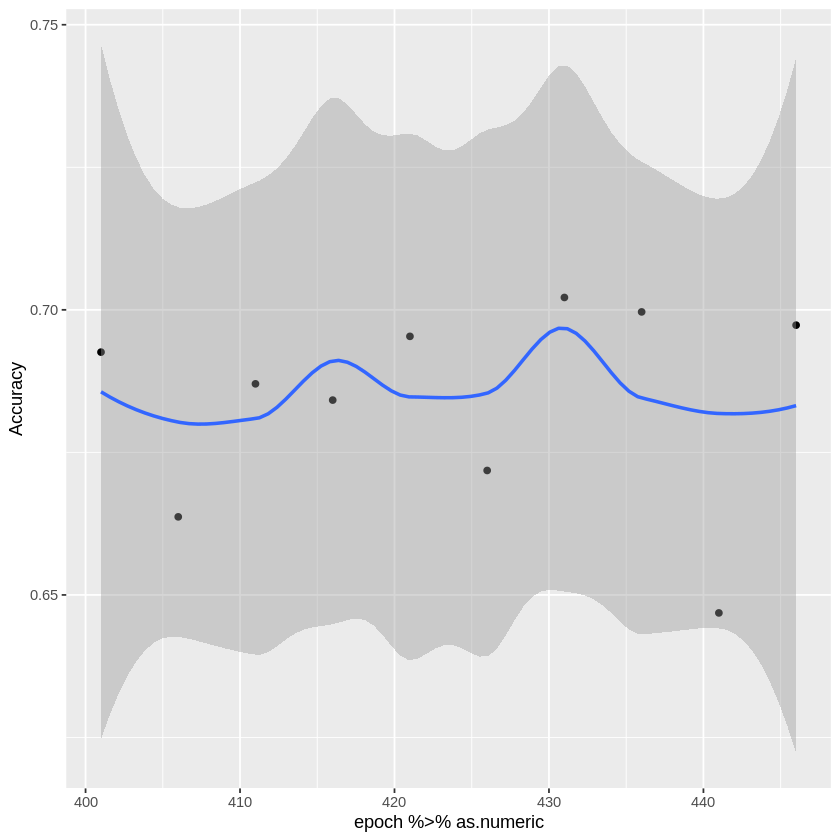

In [ ]:
accuracy_dt[order(epoch %>% as.numeric)] %>%
  ggplot(aes(x=epoch %>% as.numeric,y=Accuracy))+
  geom_point()+
  geom_smooth()

Batch 10

In [ ]:
# batch
confusion_dt_batch10 <-
1:nrow(batch10) %>%
  lapply(function(x){
  # cat("Processing path: ", batch3[x,]$predict_path, "\n")
  predict_rast <- stack(batch10[x,]$predict_path)
  label_rast <- stack(batch10[x,]$label_path)

  out_dt <- data.table(
  prediction = values(predict_rast) %>% unlist,
  label = values(label_rast) %>% unlist
    )
  names(out_dt) <- c('prediction', 'label')
  out_dt$epoch <- batch10[x,]$epoch
  out_dt$tile_id <- batch10[x,]$tile_id
    return(out_dt)
  }) %>% rbindlist

In [ ]:
confusion_dt_batch10[,prediction:=factor(prediction %>% paste() %>% paste())]
confusion_dt_batch10[,label:=factor(label %>% paste() %>% paste())]
confusion_dt_batch10$prediction %>% levels
confusion_dt_batch10$label %>%levels
confusion_dt_batch10 <- confusion_dt_batch10 %>%
  mutate(label = as.numeric(as.character(label))-1)
confusion_dt_batch10$label <- factor(confusion_dt_batch10$label, levels = 0:6)
levels(confusion_dt_batch10$prediction)
levels(confusion_dt_batch10$label)

accuracy_dt<-
  unique(confusion_dt_batch10$epoch) %>%
lapply(function(x){
  conf_dt <- confusion_dt_batch10[epoch ==x,]
  # print(conf_dt)
 out_dt <-  confusionMatrix(conf_dt$label,conf_dt$prediction)$overall %>% t %>%  data.table
 out_dt$epoch <- x
 return(out_dt)
}) %>% rbindlist

by_class_accuracy_dt<-
  unique(confusion_dt_batch10$epoch) %>%
lapply(function(x){
  conf_dt <- confusion_dt_batch10[epoch ==x,]
  conf_mtrx <- confusionMatrix(conf_dt$label,conf_dt$prediction)
 out_dt <-  confusionMatrix(conf_dt$label,conf_dt$prediction)$overall %>% t %>%  data.table

out_dt <- conf_mtrx$byClass %>% data.table
out_dt$class <- row.names(conf_mtrx$byClass)
 out_dt$epoch <- x
 return(out_dt)
}) %>% rbindlist

[1] "0" "1" "2" "3" "4" "5" "6"

[1] "1" "2" "3" "4" "5" "6" "7"

[1] "0" "1" "2" "3" "4" "5" "6"

[1] "0" "1" "2" "3" "4" "5" "6"

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


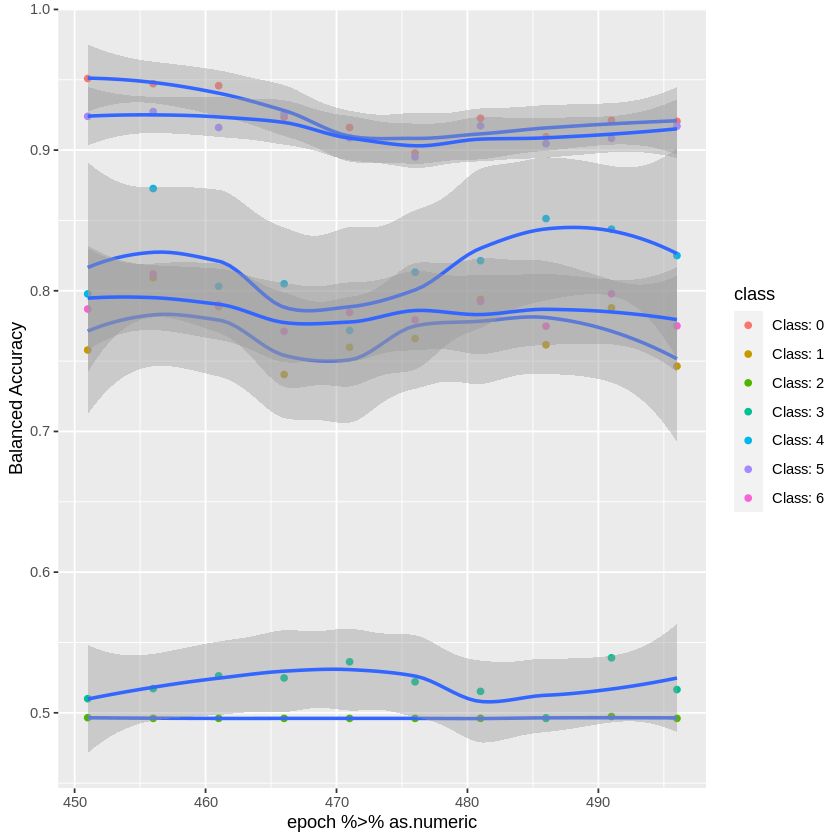

In [ ]:
by_class_accuracy_dt[order(epoch %>% as.numeric)] %>%
  ggplot(aes(x=epoch %>% as.numeric,y=`Balanced Accuracy`,group = class))+
  geom_point(aes(color=class))+
  geom_smooth()

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


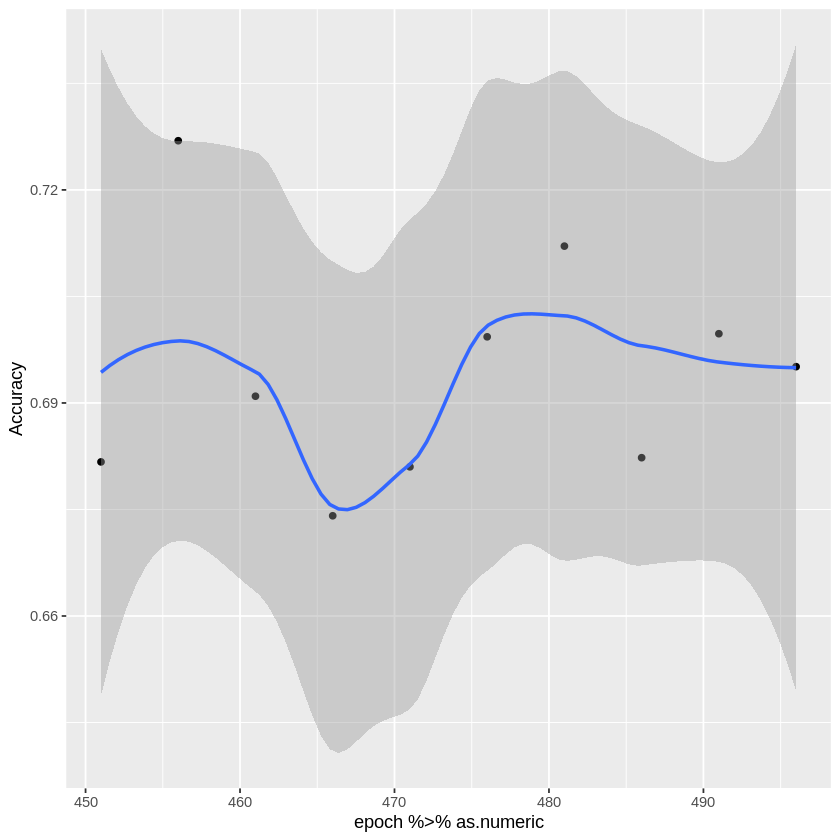

In [ ]:
accuracy_dt[order(epoch %>% as.numeric)] %>%
  ggplot(aes(x=epoch %>% as.numeric,y=Accuracy))+
  geom_point()+
  geom_smooth()

end

In [ ]:
paueir i3847328p75 fdone 3y85l!

ERROR: Error in parse(text = x, srcfile = src): <text>:1:8: unexpected symbol
1: paueir i3847328p75
           ^


In [ ]:
raster_list_01 <- lapply(file_list_01, stack)

In [ ]:
raster_list_02 <- lapply(file_list_02, stack)

In [ ]:
raster_list_03 <- lapply(file_list_03, stack)

In [ ]:
raster_list_labels <- lapply(file_list_labels, stack)

In [ ]:
# raster_list_01 # 77
# raster_list_02 # 77
# raster_list_03 # 77
# raster_list_labels # 7

In [ ]:
# val_dt <- data.table(truth = values(groudTruth_raster_list[[1]]),prediction = values(oneYear_raster_list[[1]]))
val_dt <- data.table(truth = values(raster_list_labels[[1]]), prediction = values(raster_list_01[[1]]))

In [ ]:
val_dt

In [ ]:
confus_dt <- confusionMatrix(val_dt$truth %>% factor(levels = 0:12), val_dt$prediction %>% factor(levels = 0:12))

In [ ]:
byClass_dt <- confus_dt$byClass %>% data.table

In [ ]:
byClass_dt$Sensitivity


In [ ]:
# library(raster)
# library(data.table)
# library(caret)

# # Initialize an empty list to store the confusion matrices or data.tables
# confusion_matrices <- list()

# # Loop through the raster_list_labels
# for (i in 1:length(raster_list_labels)) {
#   # Define the corresponding indices for raster_list_01
#   start_index <- (i - 1) * 10 + 1
#   end_index <- i * 10

#   # Loop through the set of 10 predictions corresponding to the current ground truth raster
#   for (j in start_index:end_index) {
#     # Extract pixel values for the prediction and the ground truth
#     prediction_values <- getValues(raster_list_01[[j]])
#     truth_values <- getValues(raster_list_labels[[i]])

#     # Ensure both are factors with the same levels before comparison
#     max_label <- max(max(truth_values, na.rm = TRUE), max(prediction_values, na.rm = TRUE), na.rm = TRUE)
#     levels <- as.character(0:max_label) # Assuming your class labels start from 0 and go up to max_label
#     truth_values <- factor(truth_values, levels = levels)
#     prediction_values <- factor(prediction_values, levels = levels)

#     # Calculate the confusion matrix for the current pair
#     cm <- confusionMatrix(prediction_values, truth_values)

#     # Store the confusion matrix in the list with a descriptive name
#     name <- paste0("CM_GT_", i, "_Pred_", j)
#     confusion_matrices[[name]] <- cm
#   }
# }

# # At this point, 'confusion_matrices' list contains a confusion matrix for each pair of prediction and ground truth


In [ ]:
confusion_matrices

In [ ]:
raster_list_01 %>% length

In [ ]:
raster_list_labels %>% length

In [ ]:
library(raster)
library(caret)
library(data.table)

confusion_matrices <- list()

# Loop through the raster_list_labels
for (i in 1:length(raster_list_labels)) {

  # Loop through the set of 10 predictions corresponding to the current ground truth raster
  for (j in seq((i - 1) * 10 + 1, i * 10)) {

    # Extract pixel values for the prediction and the ground truth
    prediction_values <- getValues(raster_list_01[[j]])
    truth_values <- getValues(raster_list_labels[[i]])

    # Ensure both are factors with the same levels before comparison
    max_label <- max(max(truth_values, na.rm = TRUE), max(prediction_values, na.rm = TRUE), na.rm = TRUE)
    levels <- as.character(0:max_label) # Assuming your class labels start from 0 and go up to max_label
    truth_values <- factor(truth_values, levels = levels)
    prediction_values <- factor(prediction_values, levels = levels)

    # Calculate the confusion matrix for the current pair
    cm <- confusionMatrix(prediction_values, truth_values)

    # Extract the name directly from the RasterStack object
    raster_name <- names(raster_list_01[[j]])

    # Store the confusion matrix in the list with the raster name
    name <- paste0("CM_", raster_name)
    confusion_matrices[[name]] <- cm
  }
}


In [ ]:
# confusion_matrices <- list()

# # Loop through the raster_list_labels
# for (i in 1:length(raster_list_labels)) {

#   # Loop through the set of 10 predictions corresponding to the current ground truth raster
#   for (j in seq((i - 1) * 10 + 1, i * 10)) {

#     # Extract pixel values for the prediction and the ground truth
#     prediction_values <- getValues(raster_list_03[[j]])
#     truth_values <- getValues(raster_list_labels[[i]])

#     # Ensure both are factors with the same levels before comparison
#     max_label <- max(max(truth_values, na.rm = TRUE), max(prediction_values, na.rm = TRUE), na.rm = TRUE)
#     levels <- as.character(0:max_label) # Assuming your class labels start from 0 and go up to max_label
#     truth_values <- factor(truth_values, levels = levels)
#     prediction_values <- factor(prediction_values, levels = levels)

#     # Calculate the confusion matrix for the current pair
#     cm <- confusionMatrix(prediction_values, truth_values)

#     # Extract the name directly from the RasterStack object
#     raster_name <- names(raster_list_03[[j]])

#     # Store the confusion matrix in the list with the raster name
#     name <- paste0("CM_", raster_name)
#     confusion_matrices[[name]] <- cm
#   }
# }

In [ ]:
confusion_matrices

In [ ]:
convertCMtoDF <- function(cm) {
  cm_table <- as.table(cm$table)
  cm_df <- as.data.frame(cm_table)
  names(cm_df) <- c("Reference", "Prediction", "Freq")
  return(cm_df)
}


In [ ]:
library(ggplot2)

plotConfusionMatrix <- function(cm_df, title_prefix = "Confusion Matrix_3 Years") {
  ggplot(cm_df, aes(x = Prediction, y = Reference, fill = Freq)) +
    geom_tile(color = "white") +
    geom_text(aes(label = Freq), vjust = 1, color = "black") +
    scale_fill_gradient(low = "white", high = "steelblue") +
    labs(title = paste(title_prefix, "- Actual vs. Predicted"), x = "Predicted", y = "Actual") +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))
}


In [ ]:
# Assuming you want to plot the first confusion matrix in your list
cm_name <- names(confusion_matrices)[9]
cm_df <- convertCMtoDF(confusion_matrices[[cm_name]])
plotConfusionMatrix(cm_df, cm_name)


In [ ]:
for (cm_name in names(confusion_matrices)) {
  cm_df <- convertCMtoDF(confusion_matrices[[cm_name]])
  plot <- plotConfusionMatrix(cm_df, cm_name)
  print(plot) # Display the plot
}


In [ ]:
# oneYear_raster_list <- oneYear_file_list[57] %>% lapply(stack)
# oneYear_raster_list
# groudTruth_file_list
# groudTruth_raster_list <- groudTruth_file_list[1] %>% lapply(stack)
# groudTruth_raster_list

In [ ]:
# raster_list_01 # 77
# raster_list_02 # 77
# raster_list_03 # 77
# raster_list_labels # 7

In [ ]:
raster_list_labels[[1]]

In [ ]:
raster_list_01[[1]]